In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [3]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("C:/Users/supri/Documents/UOL/Mathematical Modelling/WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148595,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148596,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148597,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148598,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [4]:
ger = df[df['Country'] == 'Germany']
ger=ger.reset_index()
ger.index +=1

In [5]:
ger_start =ger[ger['Date_reported']=='2020-02-29']
ger_start

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
58,48964,2020-02-29,DE,Germany,EURO,10,57,0,0


### Germany Original Wave 1 : 52 - 286
### After considering start as 50 cases:
### Germany Wave 1 : 58 - 286
### Split as:
### 58-95
### 96-286

In [6]:
ger_new = ger[57:620]
ger_new = ger_new.reset_index()
ger_new.index +=1
ger_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,58,48964,2020-02-29,DE,Germany,EURO,10,57,0,0
2,59,48965,2020-03-01,DE,Germany,EURO,54,111,0,0
3,60,48966,2020-03-02,DE,Germany,EURO,18,129,0,0
4,61,48967,2020-03-03,DE,Germany,EURO,28,157,0,0
5,62,48968,2020-03-04,DE,Germany,EURO,39,196,0,0
...,...,...,...,...,...,...,...,...,...,...
559,616,49522,2021-09-09,DE,Germany,EURO,15431,4046112,50,92498
560,617,49523,2021-09-10,DE,Germany,EURO,12969,4059081,55,92553
561,618,49524,2021-09-11,DE,Germany,EURO,11214,4070295,45,92598
562,619,49525,2021-09-12,DE,Germany,EURO,7345,4077640,8,92606


In [7]:
ger_pop = 83240000

ger_norm_case = ger_new['Cumulative_cases']/ger_pop

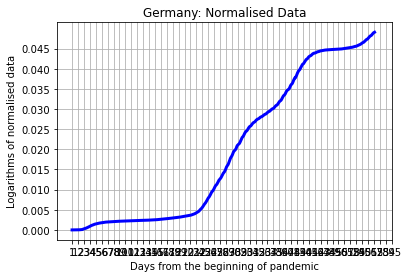

In [8]:
x1 = ger_new.index
y1 = ger_norm_case

plt.plot(x1,y1,color="blue",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(0,0.05,0.005))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Germany: Normalised Data')
plt.rcParams['figure.figsize'] = [32,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

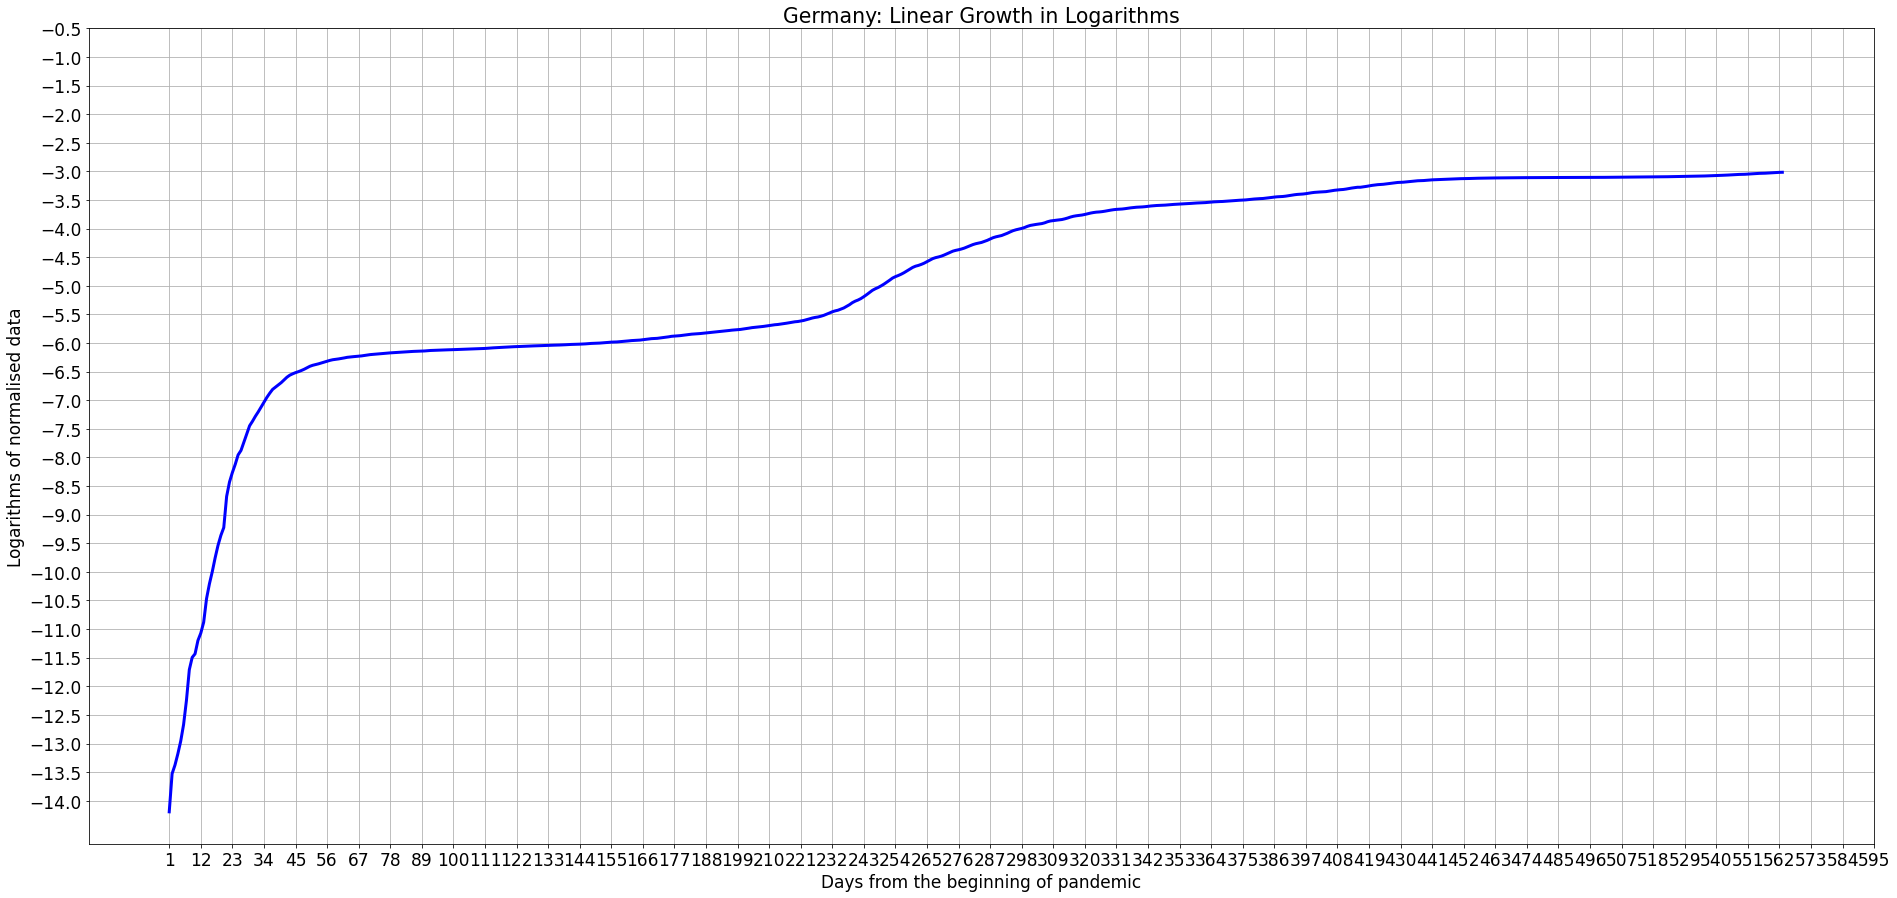

In [9]:
x1 = ger_new.index
y1 = np.log(ger_norm_case)

plt.plot(x1,y1,color="blue",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Germany: Linear Growth in Logarithms')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 1 : 1-38
### Interval 2 : 39 - 229
### Interval 3 : 1-229
### Interval 4: 1-563

In [10]:
x = ger_new.index.values
y= np.log(ger_norm_case)
x_int1 = x[:38]
y_int1 = y[:38]
x_int2 = x[38:229]
y_int2 = y[38:229]
x_int3 = x[:229]
y_int3 = y[:229]
x_int4 = x[:563]
y_int4 = y[:563]

#Interval 1
curve1 = np.polyfit(x_int1,y_int1,1)
r1= curve1[0]
c1= curve1[1]
print(r1,c1)

#Interval 2
curve2 = np.polyfit(x_int2,y_int2,1)
r2= curve2[0]
c2= curve2[1]
print(r2,c2)

#Interval 3
curve3 = np.polyfit(x_int3,y_int3,1)
r3= curve3[0]
c3= curve3[1]
print(r3,c3)

#Interval 4
curve4 = np.polyfit(x_int4,y_int4,1)
r4= curve4[0]
c4= curve4[1]
print(r4,c4)

print(x)

0.20219302192571031 -13.521548854162306
0.00415179659396571 -6.577020143269927
0.01623513349779421 -8.47814774329356
0.010052445483680584 -7.6582474775389455
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 20

In [11]:
y1 = r1*x_int1 +c1
y2 = r2*x_int2 +c2
y3 = r3*x_int3 +c3
y4 = r4*x_int4 +c4

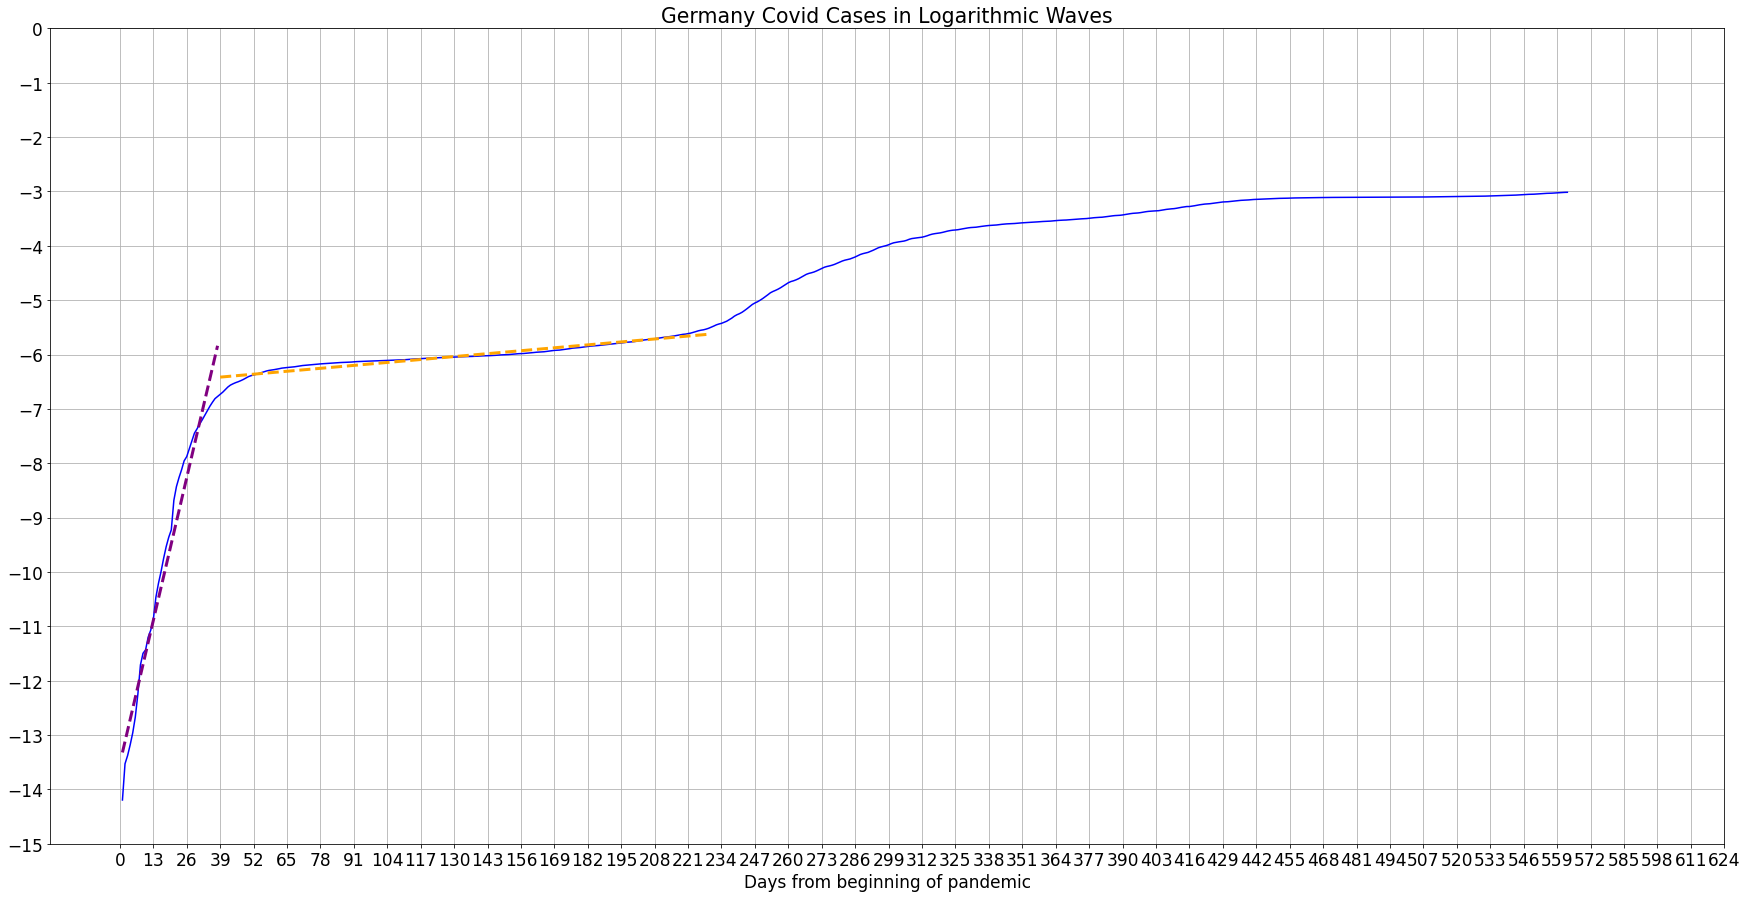

In [12]:
plt.plot(x,y,color="blue")
plt.plot(x_int1,y1,color="purple",linestyle="dashed",linewidth=3.0)
plt.plot(x_int2,y2,color="orange",linestyle="dashed",linewidth=3.0)
plt.xticks(np.arange(0,625,13))
plt.yticks(np.arange(-15,1,1))
plt.title('Germany Covid Cases in Logarithmic Waves')
plt.xlabel('Days from beginning of pandemic')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [13]:
waveEnd = 228
b=0.1
a1= r1+b
print(a1)

0.3021930219257103


In [14]:
print(x_int1)
print(r1)
print(c1)

print(r1*x[33]+c1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
0.20219302192571031
-13.521548854162306
-6.646986108688155


In [15]:
from scipy.special import expit

obv_y = ger_norm_case[:38]

linreg = c1 + r1 * x_int1
expit(linreg)
exp_y = np.exp(linreg)
print(exp_y)

[1.64239366e-06 2.01042823e-06 2.46093355e-06 3.01239002e-06
 3.68741921e-06 4.51371182e-06 5.52516360e-06 6.76326580e-06
 8.27880721e-06 1.01339576e-05 1.24048180e-05 1.51845425e-05
 1.85871594e-05 2.27522493e-05 2.78506703e-05 3.40915671e-05
 4.17309507e-05 5.10821999e-05 6.25289169e-05 7.65406630e-05
 9.36922209e-05 1.14687173e-04 1.40386763e-04 1.71845227e-04
 2.10353038e-04 2.57489843e-04 3.15189264e-04 3.85818217e-04
 4.72274007e-04 5.78103178e-04 7.07647001e-04 8.66219556e-04
 1.06032572e-03 1.29792803e-03 1.58877327e-03 1.94479236e-03
 2.38058971e-03 2.91404240e-03]


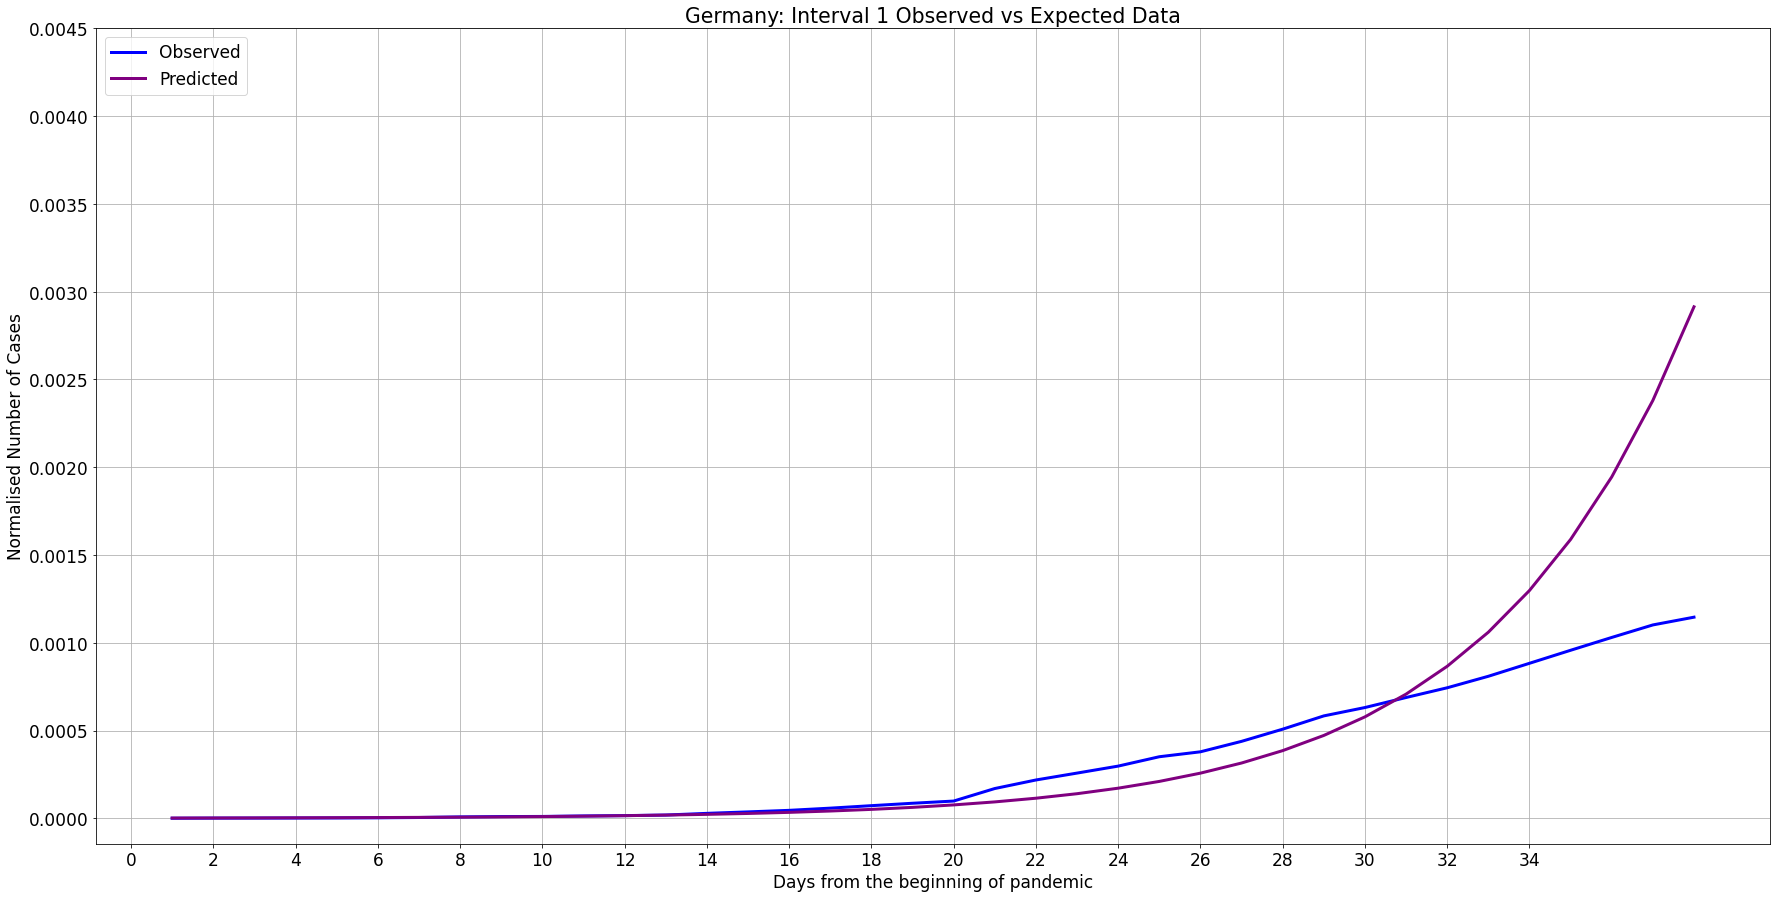

In [16]:
plt.plot(x_int1,obv_y,color="blue",linewidth=3.0,label = "Observed")
plt.plot(x_int1,exp_y,color="purple",linewidth=3.0,label = "Predicted")

plt.xticks(np.arange(0,35,2))
plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Germany: Interval 1 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Number of Cases')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc = "upper left")
plt.grid()
plt.show()

In [17]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger['Cumulative_cases'][48]
R0 = day_10 / ger_pop
print(R0)
I0 = ger_new['Cumulative_cases'][1]/ger_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)
print(S0)
Sign = S0
print(Sign)
Sres = 0
print(Sres)
Sexh = 1 - (Sign + Sres +I0 + R0)

1.802018260451706e-07
5.045651129264776e-07
0.9999993152330611
0.9999993152330611
0.9999993152330611
0


In [18]:
print(x_int1)
k2 = 1
k3 = 1/50
k6 = 1/100

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [19]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ger_norm_case[:38]


In [20]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args = (a1,b,k2,k3,k6), t_eval=x_int1)
sol.y

array([[9.99999315e-01, 9.99998587e-01, 9.99997696e-01, 9.99996605e-01,
        9.99995271e-01, 9.99993637e-01, 9.99991628e-01, 9.99988603e-01,
        9.99984559e-01, 9.99979867e-01, 9.99974747e-01, 9.99969271e-01,
        9.99963360e-01, 9.99956788e-01, 9.99949179e-01, 9.99940007e-01,
        9.99928596e-01, 9.99914124e-01, 9.99895617e-01, 9.99871951e-01,
        9.99841856e-01, 9.99803910e-01, 9.99756543e-01, 9.99698036e-01,
        9.99626519e-01, 9.99539975e-01, 9.99435693e-01, 9.99307545e-01,
        9.99152207e-01, 9.98964719e-01, 9.98737424e-01, 9.98459969e-01,
        9.98119302e-01, 9.97699675e-01, 9.97182642e-01, 9.96547059e-01,
        9.95769088e-01, 9.94822189e-01],
       [0.00000000e+00, 5.53915802e-07, 1.22100188e-06, 2.02621105e-06,
        3.00141945e-06, 4.18570043e-06, 5.63221985e-06, 7.78956072e-06,
        1.06598347e-05, 1.39837609e-05, 1.76066834e-05, 2.14785716e-05,
        2.56540197e-05, 3.02922468e-05, 3.56570974e-05, 4.21170407e-05,
        5.01451712e-05,

In [21]:
#p = 1 - sol.y[0, :]
p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))
#p_df = pd.DataFrame(p, columns="Value")

print(p)

[6.84766939e-07 8.53781438e-07 1.06067375e-06 1.31372447e-06
 1.62351347e-06 2.00301084e-06 2.46986765e-06 3.17310380e-06
 4.11341625e-06 5.20465673e-06 6.39542947e-06 7.66909124e-06
 9.04375132e-06 1.05722715e-05 1.23422662e-05 1.44761022e-05
 1.71308988e-05 2.04985280e-05 2.48056142e-05 3.03135344e-05
 3.73184179e-05 4.61511467e-05 5.71773555e-05 7.07974311e-05
 8.74465132e-05 1.07594494e-04 1.31872632e-04 1.61709118e-04
 1.97876898e-04 2.41529800e-04 2.94450496e-04 3.59050505e-04
 4.38370190e-04 5.36078758e-04 6.56474263e-04 8.04483601e-04
 9.85662517e-04 1.20619560e-03]


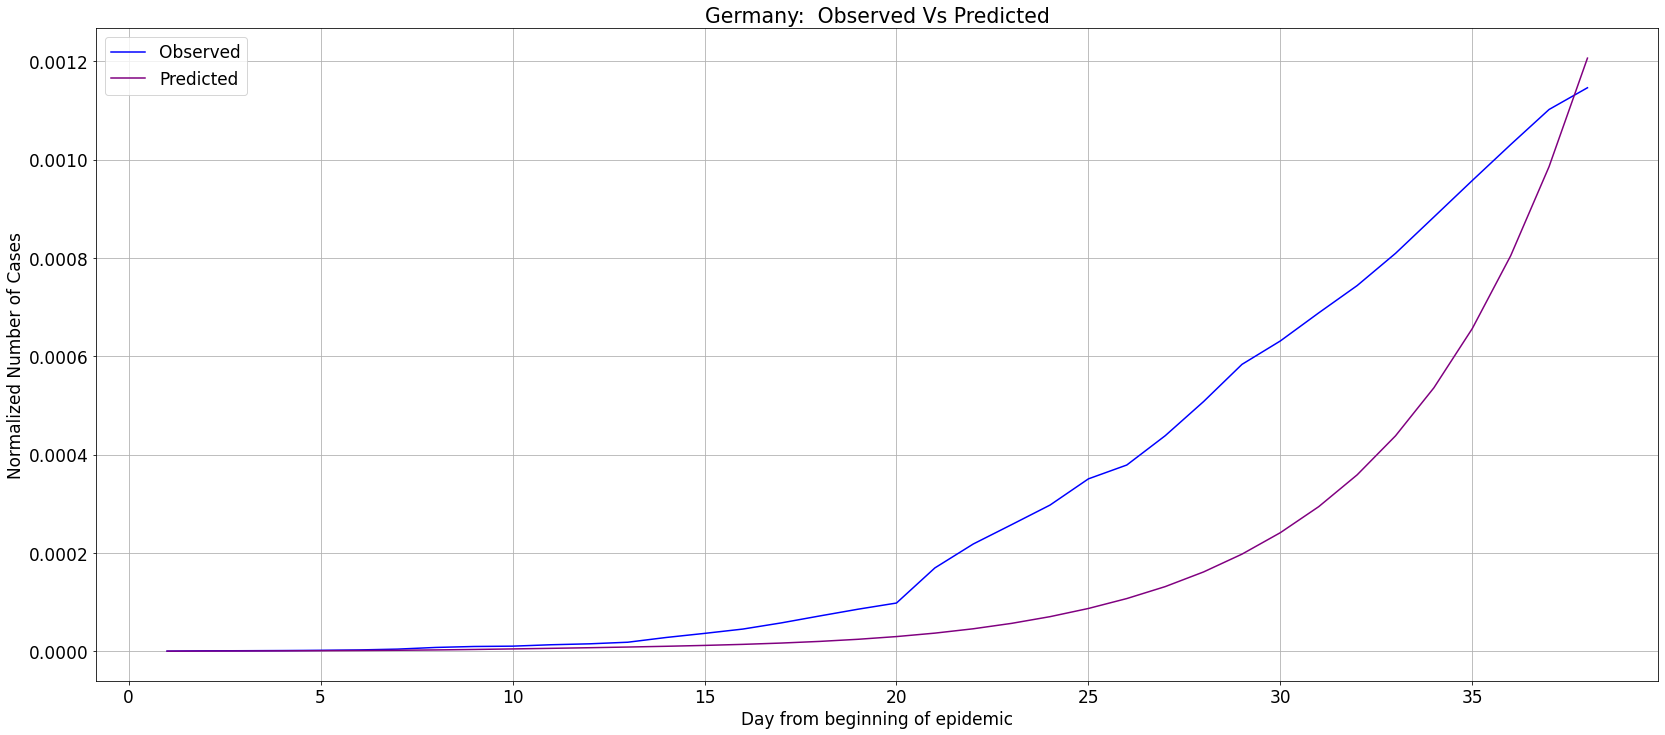

In [22]:
plt.figure()
plt.plot(x_int1,ger_norm_case[:38],color="blue", label = 'Observed')
plt.plot(x_int1, p, color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

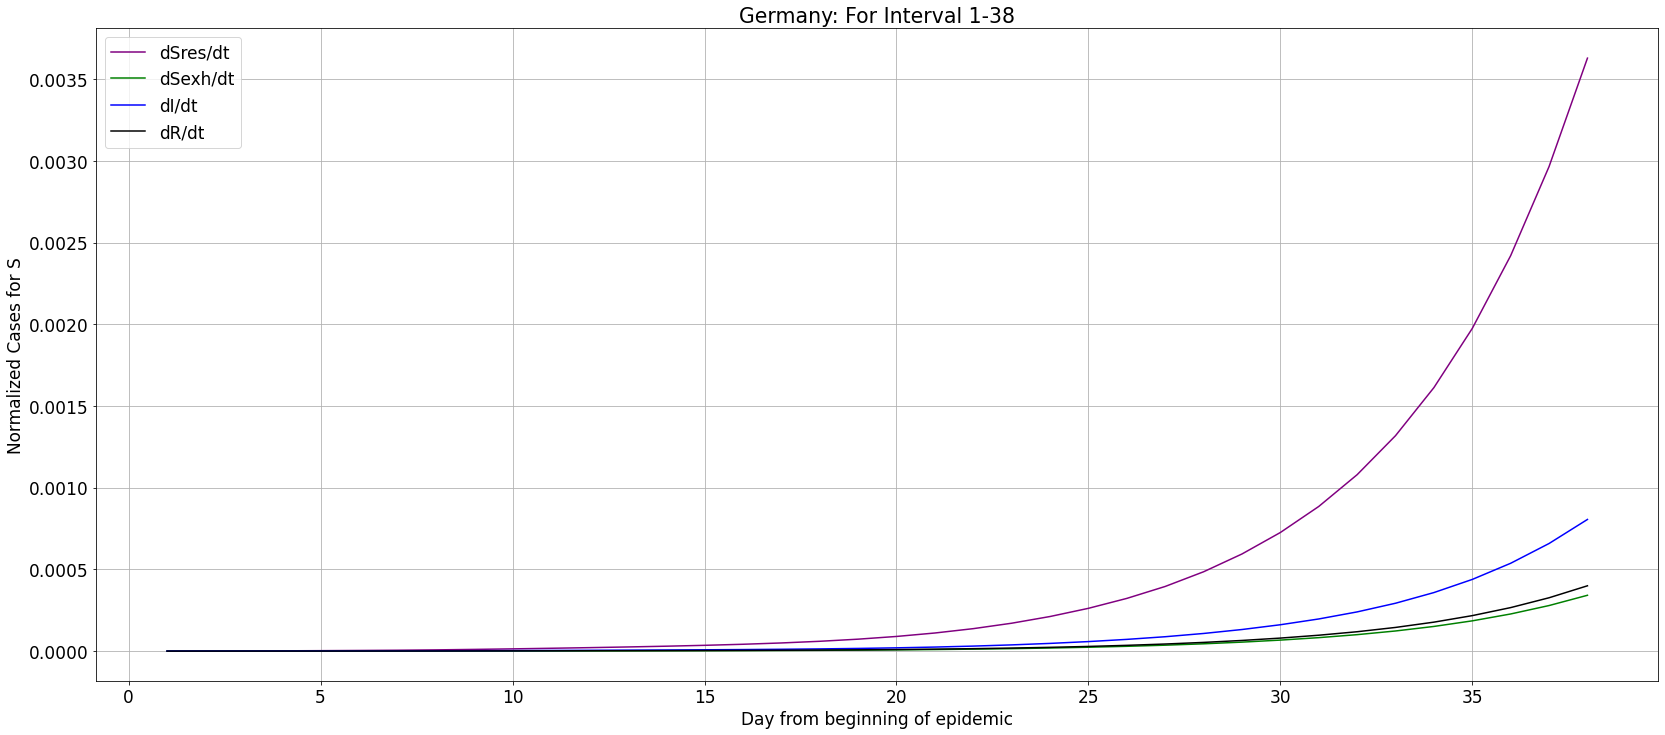

In [23]:
plt.figure()
#plt.plot(x_int1,sol.y[0],color="red", label = 'dSign/dt')
plt.plot(x_int1,sol.y[1], color="purple",label = 'dSres/dt')
plt.plot(x_int1,sol.y[2], color="green",label = 'dSexh/dt')
plt.plot(x_int1,sol.y[3], color="blue",label = 'dI/dt')
plt.plot(x_int1,sol.y[4], color="black",label = 'dR/dt')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Cases for S')
plt.title('Germany: For Interval 1-38')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [24]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args=(a1,b,k2,k3,k6), t_eval=x_int1)

p = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p - inp))
#p_df = pd.DataFrame(p, columns="Value")

print(p)


[6.84766939e-07 8.53785816e-07 1.06087196e-06 1.31379340e-06
 1.62286692e-06 2.00138778e-06 2.46562974e-06 3.03484503e-06
 3.73560540e-06 5.08774930e-06 7.16753569e-06 9.65018586e-06
 1.22883938e-05 1.49123263e-05 1.74296228e-05 1.98253956e-05
 2.21622294e-05 2.45801820e-05 2.72967837e-05 3.06070377e-05
 3.48834197e-05 4.05758783e-05 4.82118348e-05 5.83961831e-05
 7.18112900e-05 8.92169949e-05 1.11450610e-04 1.39426920e-04
 1.74138183e-04 2.16654129e-04 2.68121961e-04 3.29766355e-04
 4.03735332e-04 4.94145496e-04 6.04686343e-04 7.39993600e-04
 9.05712496e-04 1.10849776e-03]


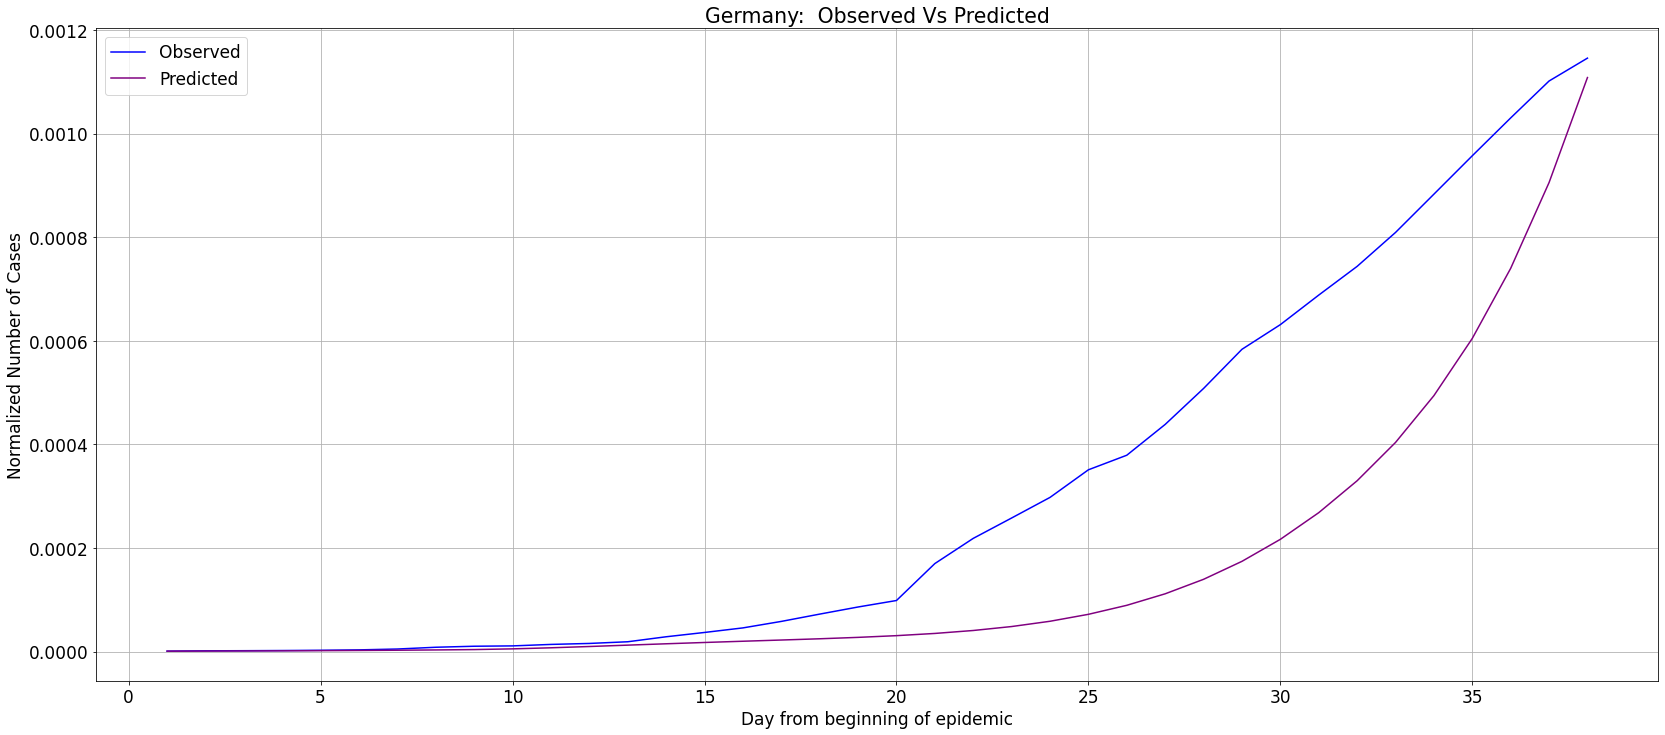

In [25]:
plt.figure()
plt.plot(x_int1,ger_norm_case[:38],color="blue", label = 'Observed')
plt.plot(x_int1, p, color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [26]:
#Crowd Effect

In [27]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)
print(x_int1)

0.01999998630466122
50.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [28]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = ger_norm_case[:38]

In [29]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args = (a1,b,rate,k3,k6), t_eval=x_int1)
#print(sol.y)

In [30]:
p = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(p - inp))

print(a1,MSE)
print(p)
#print(tur_norm_case[:29])

0.3021930219257103 1.9872598371849633e-07
[6.84766939e-07 8.51835032e-07 1.05105582e-06 1.28728104e-06
 1.56578909e-06 1.89227130e-06 2.27169519e-06 2.70391546e-06
 3.19793965e-06 3.76420346e-06 4.41271173e-06 5.15303842e-06
 5.99432667e-06 6.94528873e-06 8.01420602e-06 9.20892908e-06
 1.05368776e-05 1.20050404e-05 1.36199755e-05 1.53878099e-05
 1.73142401e-05 1.94045312e-05 2.16635180e-05 2.40956040e-05
 2.67047493e-05 2.94940276e-05 3.24652161e-05 3.56189462e-05
 3.89547124e-05 4.24708722e-05 4.61646460e-05 5.00321172e-05
 5.40682322e-05 5.82668002e-05 6.26204937e-05 6.71208479e-05
 7.17582610e-05 7.65219942e-05]


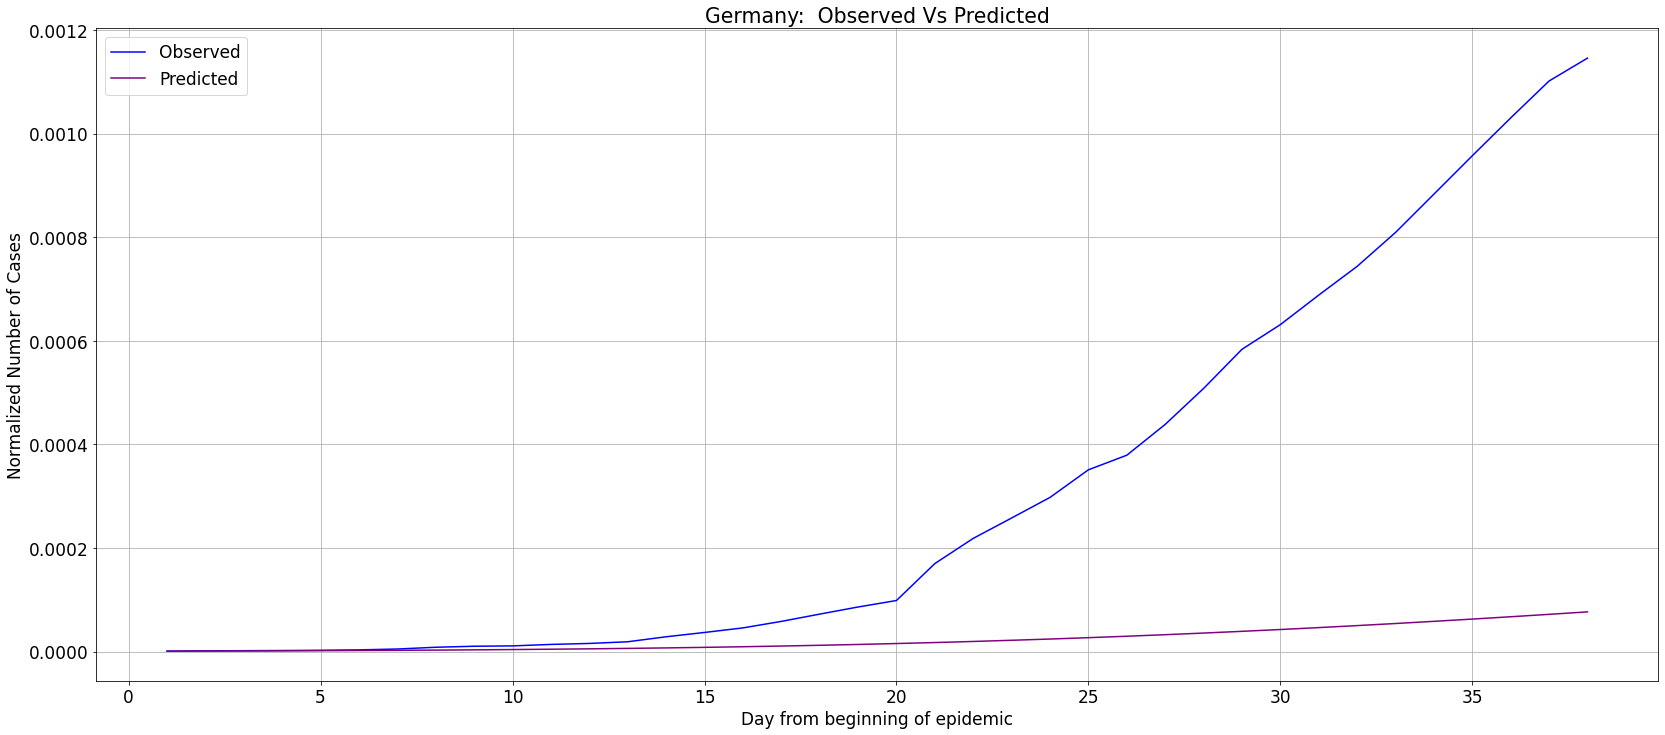

In [36]:
plt.figure()
plt.plot(x_int1, ger_norm_case[:38], color="blue", label = 'Observed')
plt.plot(x_int1, p, color="purple", label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [37]:
#Interval 2
obv_y = ger_norm_case[38:229]
linreg2 = c2 + r2 * x_int2
expit(linreg2)
exp_y = np.exp(linreg2)
print(exp_y)

[0.00163666 0.00164347 0.0016503  0.00165717 0.00166406 0.00167099
 0.00167794 0.00168492 0.00169193 0.00169897 0.00170604 0.00171313
 0.00172026 0.00172742 0.00173461 0.00174182 0.00174907 0.00175635
 0.00176365 0.00177099 0.00177836 0.00178576 0.00179319 0.00180065
 0.00180814 0.00181566 0.00182322 0.0018308  0.00183842 0.00184607
 0.00185375 0.00186146 0.0018692  0.00187698 0.00188479 0.00189263
 0.00190051 0.00190841 0.00191635 0.00192433 0.00193233 0.00194037
 0.00194844 0.00195655 0.00196469 0.00197286 0.00198107 0.00198931
 0.00199759 0.0020059  0.00201425 0.00202263 0.00203104 0.00203949
 0.00204798 0.0020565  0.00206505 0.00207364 0.00208227 0.00209093
 0.00209963 0.00210837 0.00211714 0.00212595 0.00213479 0.00214368
 0.00215259 0.00216155 0.00217054 0.00217957 0.00218864 0.00219775
 0.00220689 0.00221607 0.00222529 0.00223455 0.00224385 0.00225318
 0.00226256 0.00227197 0.00228142 0.00229091 0.00230044 0.00231002
 0.00231963 0.00232928 0.00233897 0.0023487  0.00235847 0.0023

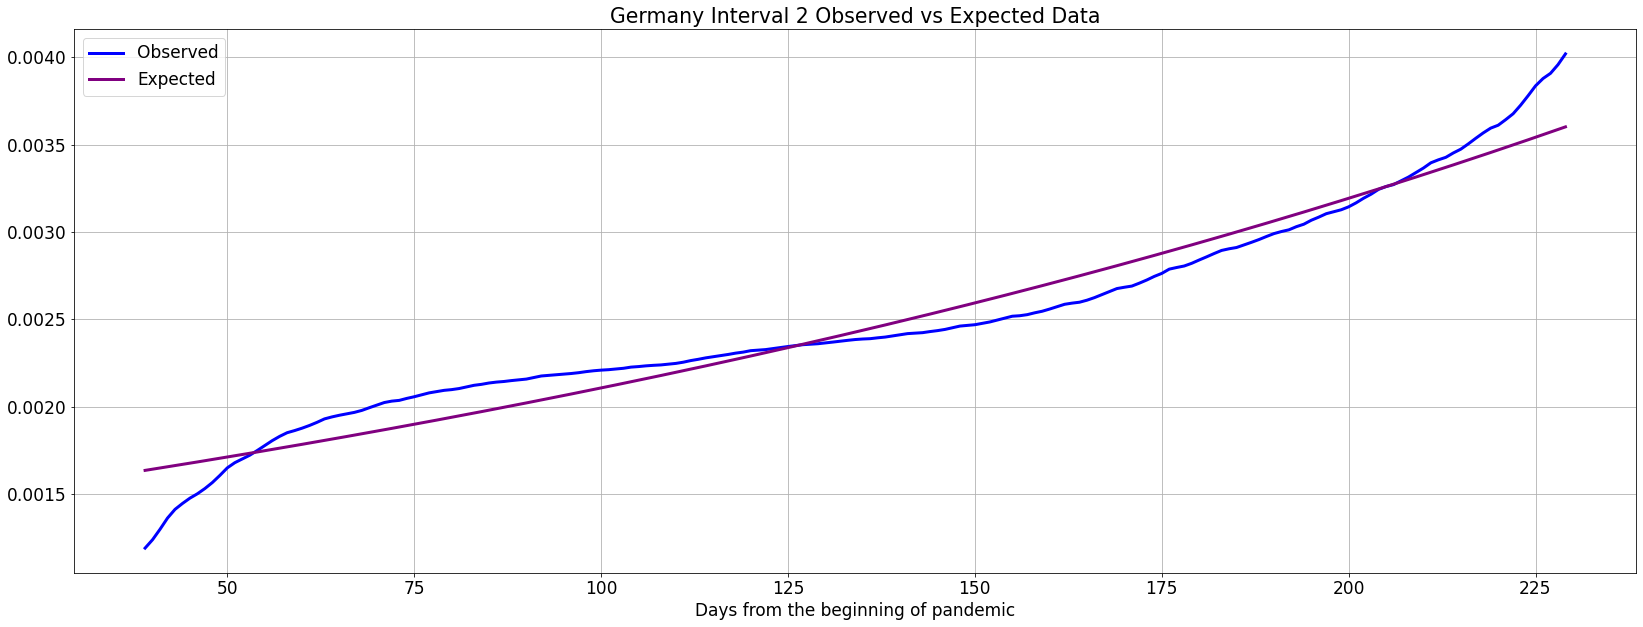

In [38]:
plt.plot(x_int2,obv_y,color="blue",linewidth=3.0, label = "Observed")
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0, label = "Expected")

plt.title('Germany Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [95]:
day_10_ger = ger_new['Cumulative_cases'][25]
R1 = day_10_ger / ger_pop
print(R1)
I1 = ger_new['Cumulative_cases'][35]/ger_pop - R1
print(I1)
S1 = 1- I1 - R1
print(S1)
Sign = S1
print(Sign)
Sres = 0
Sexh = 1- (Sign +Sres + I1 + R1)

0.0003509370494954349
0.0006064872657376261
0.999042575684767
0.999042575684767


In [96]:
b=0.1
a2= r2+b
print(a2)

0.10415179659396571


In [97]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]

inp = ger_norm_case[38:229]

In [98]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh, I1, R1], args = (a2,b,k2,k3,k6), t_eval= x_int2-38)


In [99]:
p = sol.y[2] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)

0.10415179659396571 0.001152706548058598
[0.00035094 0.00041771 0.00049653 0.00058707 0.00068902 0.00080208
 0.00092595 0.00106035 0.00120497 0.00135955 0.00152381 0.00169748
 0.00188028 0.00207197 0.00227229 0.00248097 0.00269775 0.00292238
 0.00315465 0.00339433 0.00364123 0.00389512 0.00415579 0.00442305
 0.00469668 0.0049765  0.0052623  0.00555389 0.00585108 0.00615369
 0.00646154 0.00677443 0.00709221 0.00741468 0.00774168 0.00807305
 0.00840862 0.00874822 0.0090917  0.0094389  0.00978968 0.01014387
 0.01050134 0.01086194 0.01122554 0.01159199 0.01196113 0.01233281
 0.01270693 0.01308338 0.01346207 0.01384288 0.01422573 0.01461051
 0.01499711 0.01538546 0.01577544 0.01616697 0.01655995 0.01695428
 0.01734989 0.01774668 0.01814456 0.01854345 0.01894326 0.0193439
 0.01974529 0.02014736 0.02055002 0.02095319 0.02135679 0.02176075
 0.02216499 0.02256944 0.02297402 0.02337867 0.02378331 0.02418787
 0.02459229 0.0249965  0.02540044 0.02580403 0.02620722 0.02660995
 0.02701215 0.02741377

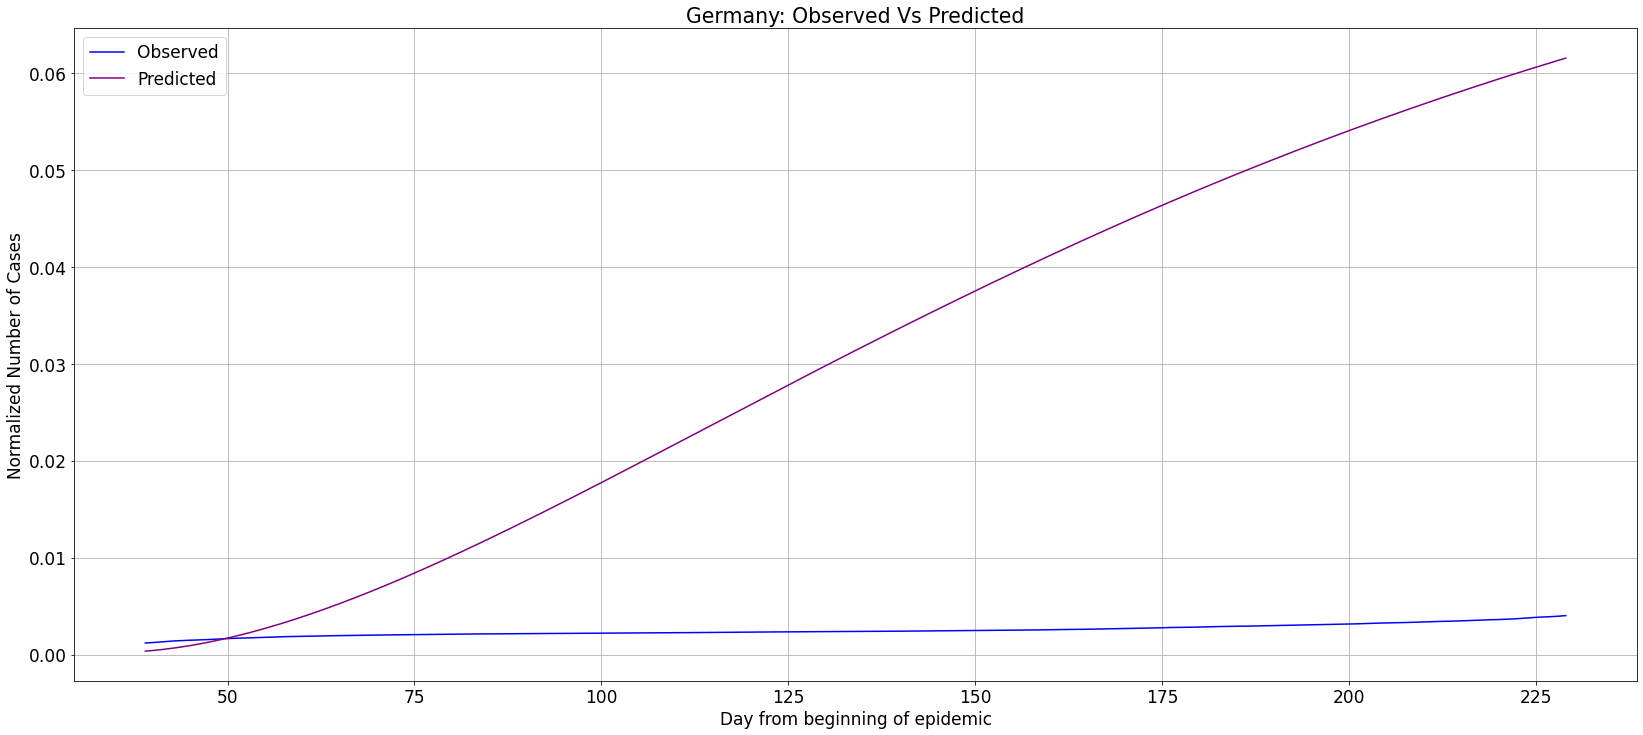

In [100]:
plt.figure()
plt.plot(x_int2,ger_norm_case[38:229],color="blue", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany: Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [101]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh, I1, R1], args = (a2,b,k2,k3,k6), t_eval= x_int2-38)

In [104]:
p = sol.y[2] + sol.y[4]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)


0.10415179659396571 6.884102809278655e-05
[0.00035094 0.00041201 0.00047392 0.00053665 0.00060018 0.00066451
 0.00072962 0.00079549 0.00086211 0.00092948 0.00099757 0.00106637
 0.00113588 0.00120608 0.00127696 0.0013485  0.00142071 0.00149355
 0.00156704 0.00164115 0.00171587 0.0017912  0.00186712 0.00194363
 0.00202072 0.00209836 0.00217654 0.00225527 0.00233454 0.00241434
 0.00249465 0.00257549 0.00265684 0.00273869 0.00282104 0.00290389
 0.00298722 0.00307103 0.00315532 0.00324008 0.00332531 0.00341099
 0.00349712 0.0035837  0.00367073 0.00375819 0.00384608 0.0039344
 0.00402314 0.00411229 0.00420185 0.00429182 0.00438218 0.00447295
 0.0045641  0.00465563 0.00474755 0.00483984 0.0049325  0.00502552
 0.00511891 0.00521265 0.00530674 0.00540118 0.00549596 0.00559108
 0.00568654 0.00578232 0.00587843 0.00597485 0.0060716  0.00616866
 0.00626604 0.00636373 0.00646174 0.00656006 0.00665869 0.00675763
 0.00685687 0.00695642 0.00705628 0.00715643 0.00725689 0.00735765
 0.0074587  0.0075600

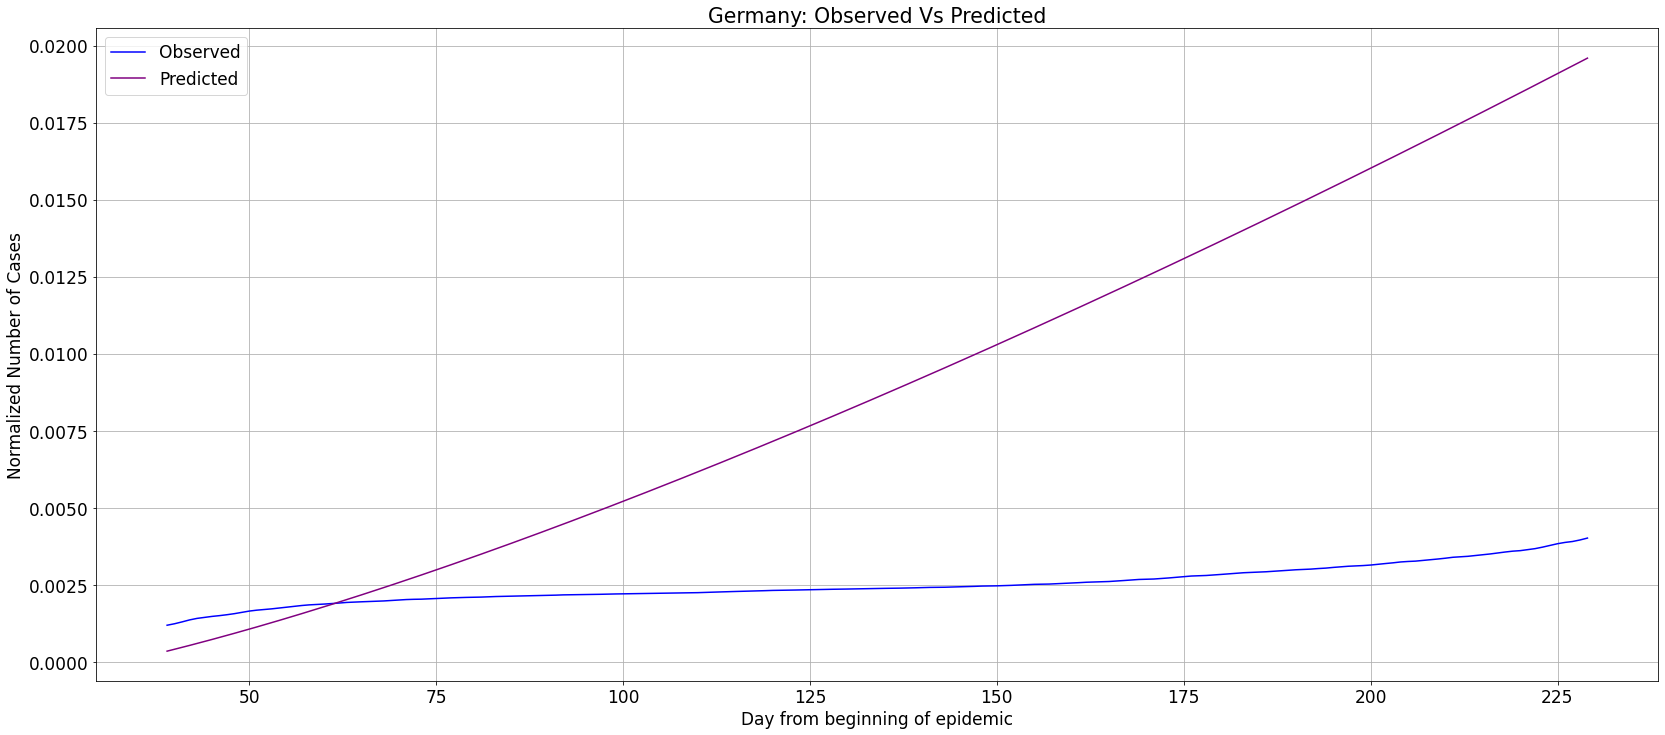

In [105]:
plt.figure()
plt.plot(x_int2,ger_norm_case[38:229],color="blue", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany: Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [106]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)
print(x_int1)

0.01998085151369534
50.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [107]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = ger_norm_case[38:229]

In [111]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign, Sres,Sexh, I1, R1],args = (a1,b,rate,k3,k6), t_eval=x_int2-38)
#print(sol.y)

In [112]:
p = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)
#print(tur_norm_case[:29])

0.10415179659396571 0.014792853229506119
[0.00095742 0.00115799 0.00139699 0.0016802  0.00201386 0.00240462
 0.00285958 0.00338584 0.00399136 0.00468509 0.00547576 0.00637187
 0.0073817  0.0085133  0.00977449 0.01117273 0.01271399 0.01440531
 0.01625272 0.01826049 0.02043113 0.0227654  0.02526235 0.02791923
 0.03073159 0.03369318 0.03679701 0.04003707 0.04339883 0.04686647
 0.05042408 0.05405567 0.05774515 0.06147635 0.06523298 0.0689987
 0.07275706 0.07649151 0.08018543 0.0838221  0.0873847  0.09085636
 0.09422325 0.0974773  0.10061176 0.10362089 0.10649987 0.10924487
 0.11185303 0.11432247 0.11665224 0.11884241 0.12089397 0.12280892
 0.1245902  0.12624174 0.12776841 0.12917608 0.13047157 0.13166267
 0.13275512 0.13375207 0.13465993 0.1354849  0.13623289 0.13690958
 0.13752033 0.13807028 0.13856428 0.13900691 0.13940248 0.13975504
 0.14006838 0.140346   0.14059116 0.14080682 0.1409957  0.14116023
 0.14130291 0.14142689 0.14153419 0.14162658 0.14170571 0.14177312
 0.14183022 0.14187832

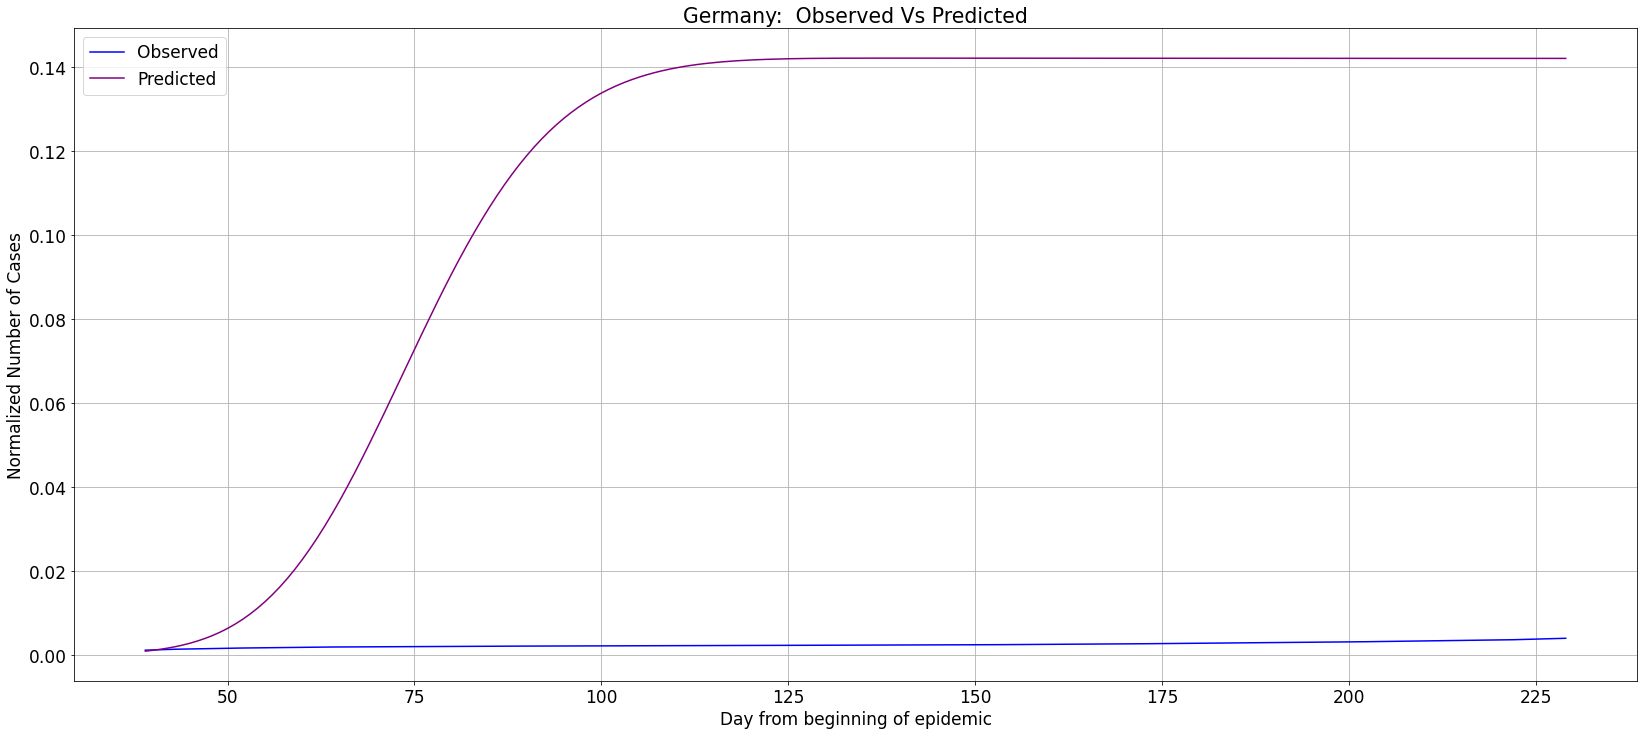

In [113]:
plt.figure()
plt.plot(x_int2,ger_norm_case[38:229],color="blue", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [53]:
#interval3

In [54]:
obv_y = ger_norm_case[:229]
linreg3 = c3 + r3 * x_int3
expit(linreg3)
exp_y = np.exp(linreg3)

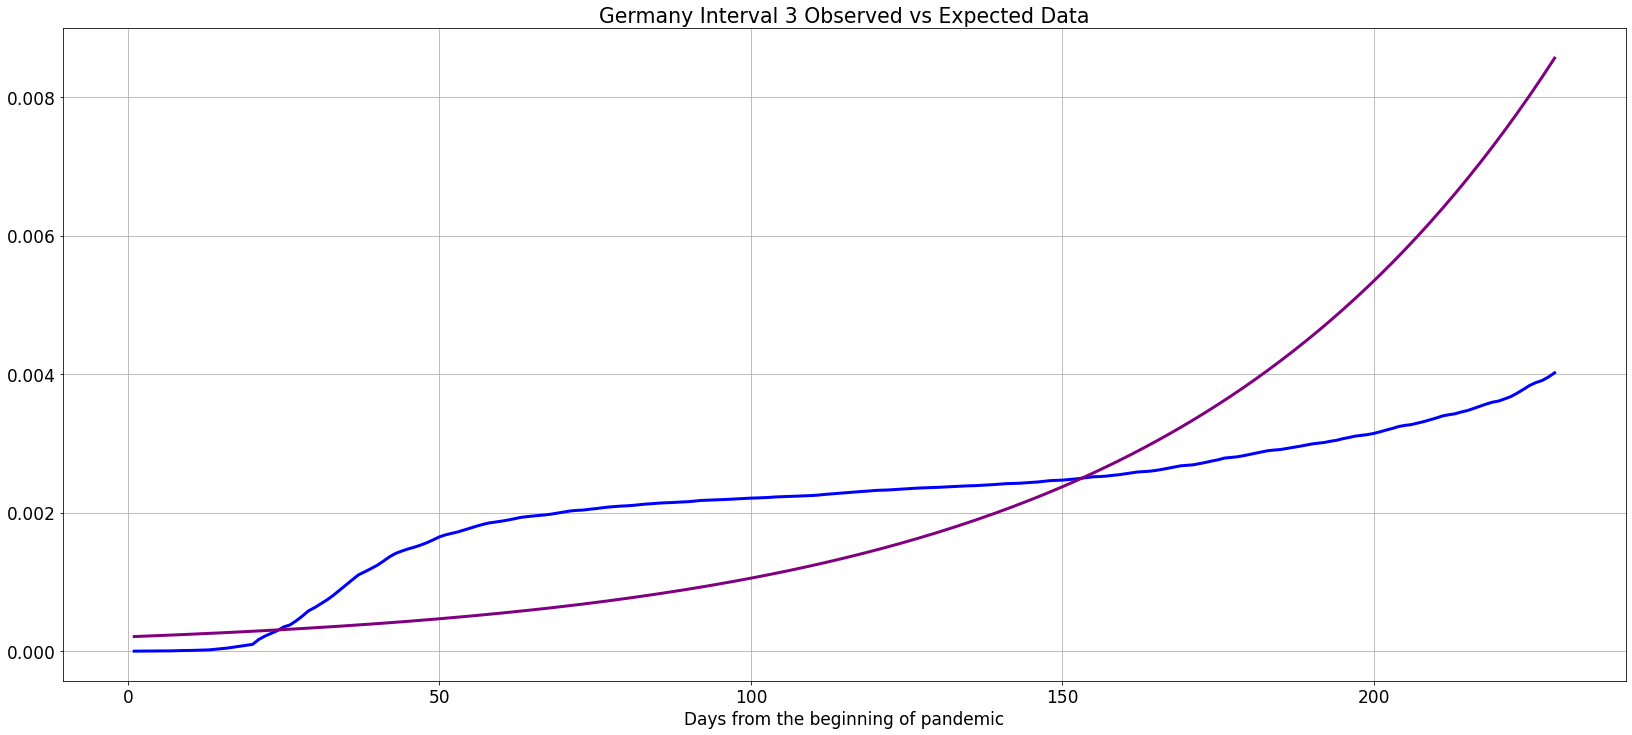

In [55]:
plt.plot(x_int3,obv_y,color="blue",linewidth=3.0)
plt.plot(x_int3,exp_y,color="purple",linewidth=3.0)

plt.title('Germany Interval 3 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [56]:
day_10_ger = ger['Cumulative_cases'][42]
R3 = day_10_ger / ger_pop
print(R3)
I3 = ger_new['Cumulative_cases'][1]/ger_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)
Sign = S3
Sres = 1- Sign
Sexh = 1- (Sign +Sres +I3+R3)

1.802018260451706e-07
5.045651129264776e-07
0.9999993152330611


In [57]:
b=0.1
a3= r3+b
print(a3)

0.11623513349779421


In [58]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt ,dIdt, dRdt]
inp = ger_norm_case[:229]

In [59]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I3,R3],args=(a3,b,k2,k3,k6), t_eval= x_int3)
sol.y

array([[ 9.99999315e-01,  9.99998741e-01,  9.99998157e-01, ...,
         9.98906815e-01,  9.98888838e-01,  9.98870570e-01],
       [ 6.84766939e-07,  1.17485087e-06,  1.66347357e-06, ...,
         5.43384680e-04,  5.52250315e-04,  5.61258910e-04],
       [-6.84766939e-07, -6.59439178e-07, -6.24625493e-07, ...,
         4.11516554e-04,  4.18323575e-04,  4.25240063e-04],
       [ 5.04565113e-07,  5.12823555e-07,  5.21217133e-07, ...,
         1.96825571e-05,  2.00031598e-05,  2.03289295e-05],
       [ 1.80201826e-07,  2.31070143e-07,  2.82771045e-07, ...,
         1.18600741e-04,  1.20585259e-04,  1.22601919e-04]])

In [60]:
#p = 1 - sol.y[0, :]
#p= sol.y[0] + sol.y[1] + sol.y[2]+sol.y[3] +sol.y[4]
p = sol.y[4] + sol.y[2] 
MSE = np.mean(np.square(p - inp))

print(a3,MSE)
print(p)

0.11623513349779421 4.7512595706942666e-06
[-5.04565113e-07 -4.28369035e-07 -3.41854448e-07 -2.45129460e-07
 -1.38297580e-07 -2.14577580e-08  1.05294534e-07  2.41664748e-07
  3.87448059e-07  5.42608938e-07  7.07113823e-07  8.80931118e-07
  1.06403119e-06  1.25638638e-06  1.45797099e-06  1.66876128e-06
  1.88873548e-06  2.11787381e-06  2.35615842e-06  2.60357345e-06
  2.86010499e-06  3.12574111e-06  3.40047184e-06  3.68428917e-06
  3.97718707e-06  4.27916146e-06  4.59021025e-06  4.91033328e-06
  5.23953238e-06  5.57781135e-06  5.92517595e-06  6.28163390e-06
  6.64719489e-06  7.02187057e-06  7.40567457e-06  7.79862248e-06
  8.20073185e-06  8.61202221e-06  9.03251503e-06  9.46223377e-06
  9.90120385e-06  1.03494527e-05  1.08070095e-05  1.12739058e-05
  1.17501747e-05  1.22358516e-05  1.27309736e-05  1.32355799e-05
  1.37497117e-05  1.42734121e-05  1.48067261e-05  1.53497008e-05
  1.59023852e-05  1.64648303e-05  1.70370891e-05  1.76192164e-05
  1.82112691e-05  1.88133060e-05  1.94253881e-0

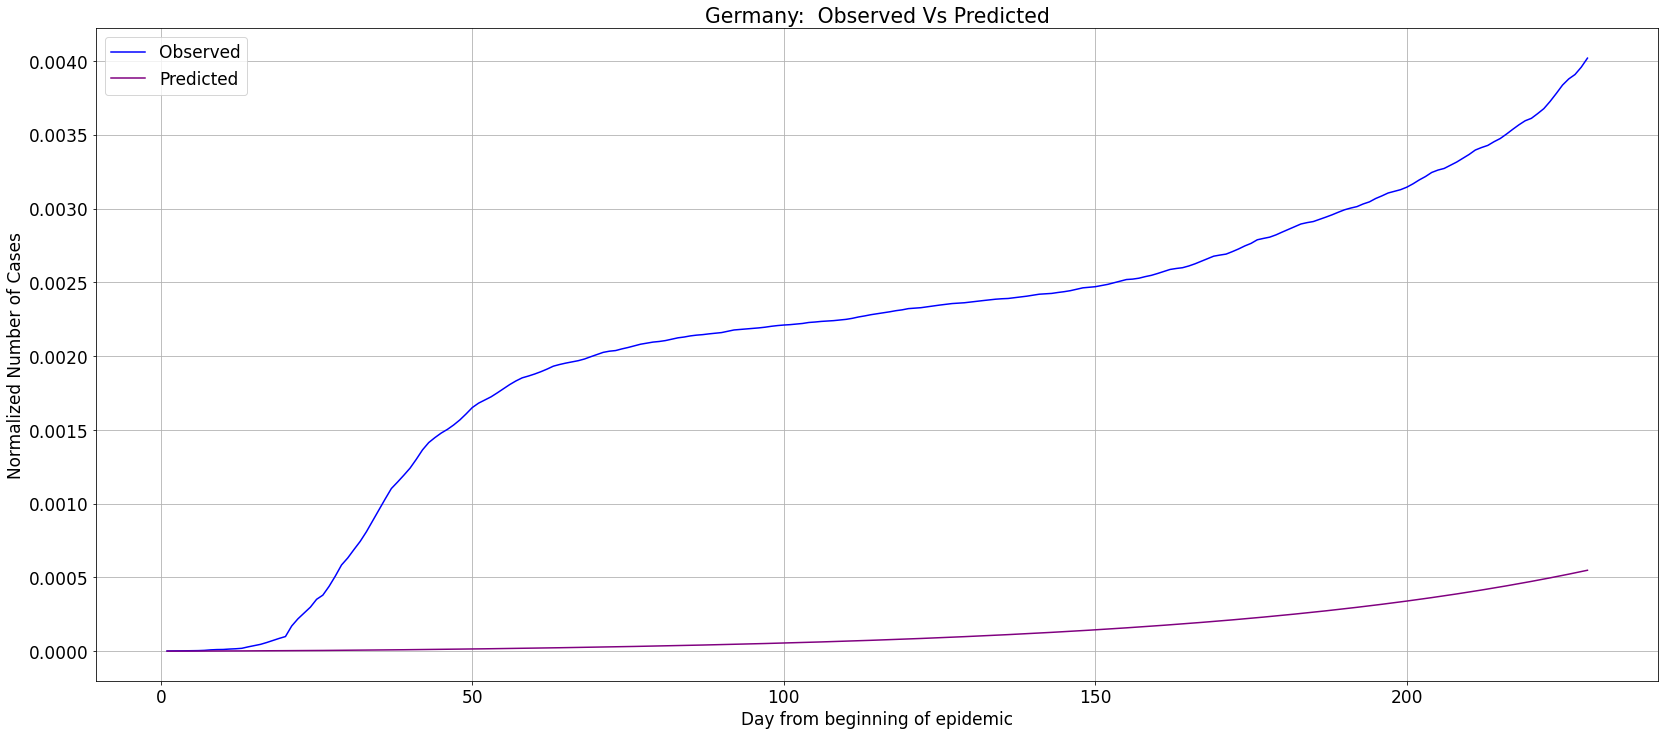

In [61]:
plt.figure()
plt.plot(x_int3,ger_norm_case[:229],color="blue", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')

plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

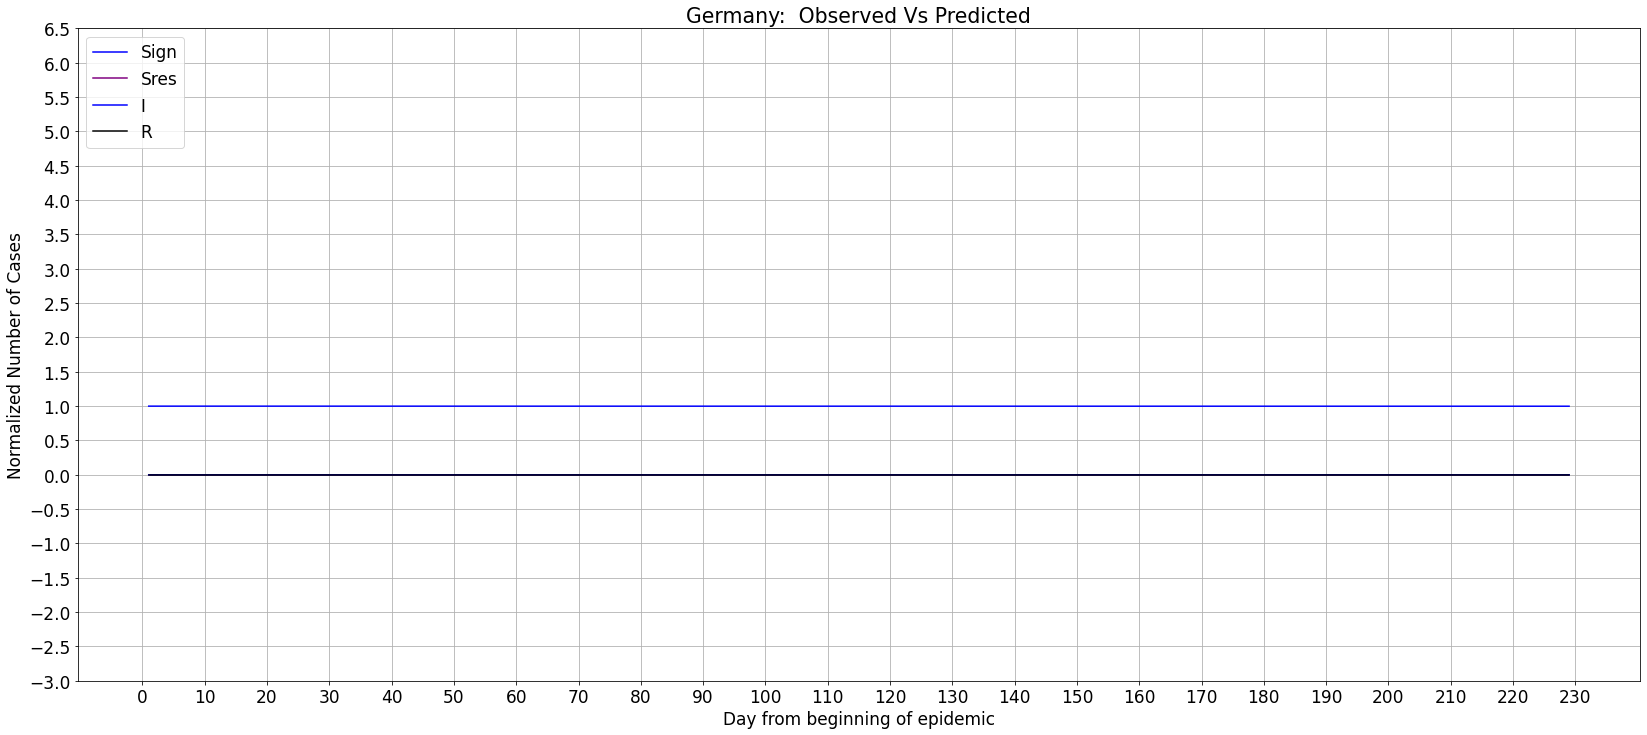

In [62]:
plt.figure()
plt.plot(x_int3,sol.y[0],color="blue", label = 'Sign')
plt.plot(x_int3,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int3,sol.y[2], color="blue",label = 'I')
plt.plot(x_int3,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(0,235,10))
plt.yticks(np.arange(-3,7,0.5))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [63]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I3,R3],args=(a3,b,k2,k3,k6), t_eval= x_int3)

In [64]:
p = sol.y[4] + sol.y[2] 
MSE = np.mean(np.square(p - inp))

print(a3,MSE)
print(p)

0.11623513349779421 5.311875125884545e-06
[-5.04565113e-07 -4.33140578e-07 -3.60854873e-07 -2.87691013e-07
 -2.13631765e-07 -1.38659624e-07 -6.27568202e-08  1.40946878e-08
  9.19132083e-08  1.70717319e-07  2.50535119e-07  3.31399057e-07
  4.13324596e-07  4.96327474e-07  5.80423995e-07  6.65631021e-07
  7.51965980e-07  8.39446860e-07  9.28092213e-07  1.01792115e-06
  1.10895336e-06  1.20120907e-06  1.29470908e-06  1.38947476e-06
  1.48552803e-06  1.58289139e-06  1.68158789e-06  1.78164113e-06
  1.88307530e-06  1.98591514e-06  2.09018594e-06  2.19591357e-06
  2.30312447e-06  2.41184560e-06  2.52210454e-06  2.63392939e-06
  2.74734883e-06  2.86239209e-06  2.97908899e-06  3.09746987e-06
  3.21756568e-06  3.33940790e-06  3.46302857e-06  3.58846032e-06
  3.71573632e-06  3.84489032e-06  3.97595660e-06  4.10897004e-06
  4.24396606e-06  4.38098065e-06  4.52005036e-06  4.66121231e-06
  4.80450417e-06  4.94996418e-06  5.09763115e-06  5.24754444e-06
  5.39974396e-06  5.55427023e-06  5.71116427e-06

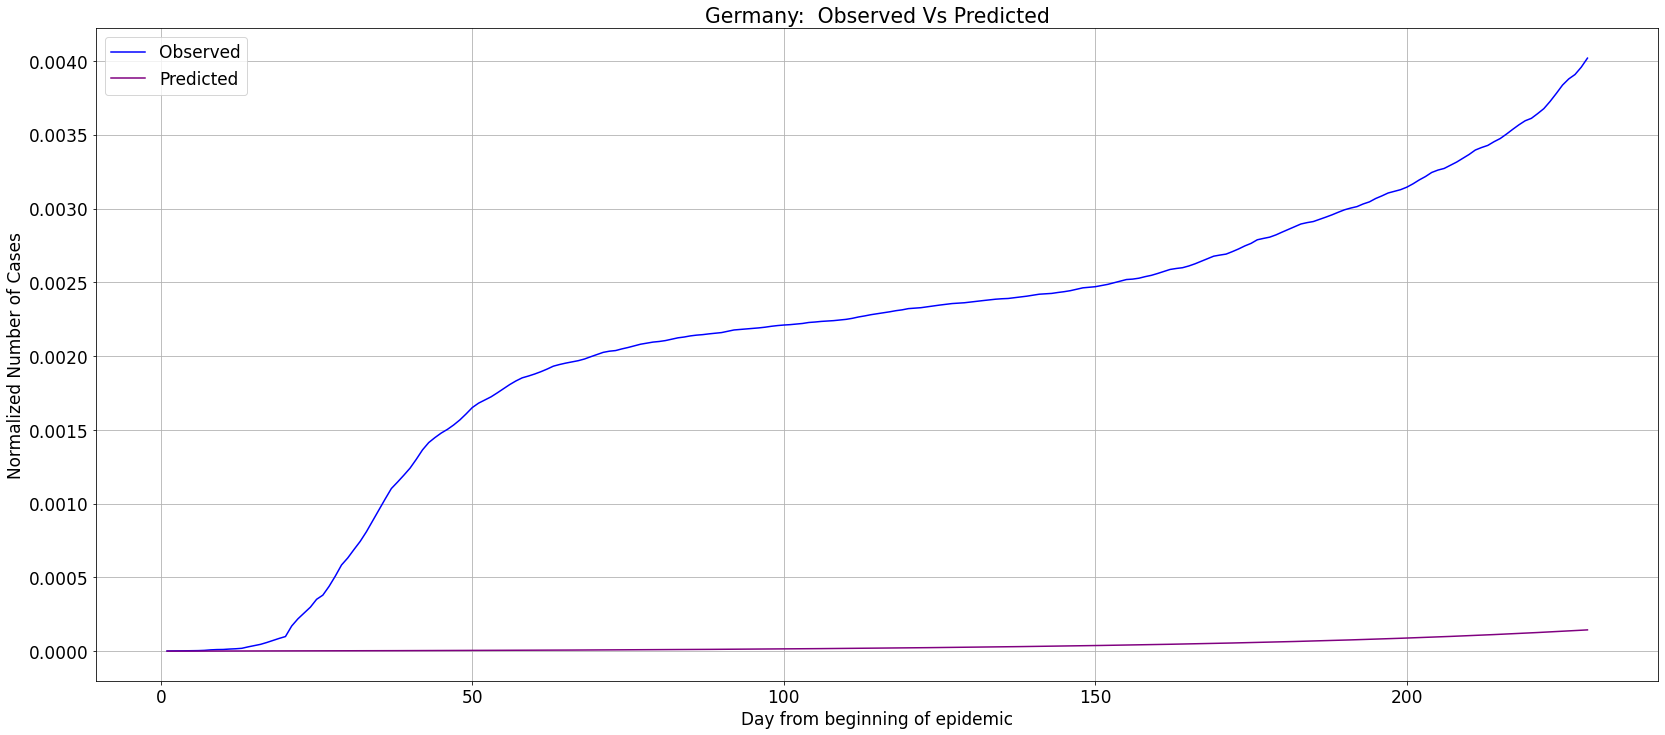

In [65]:
plt.figure()
plt.plot(x_int3,ger_norm_case[:229],color="blue", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')

#plt.xticks(np.arange(-1,238,0.))
#plt.yticks(np.arange(-1,2.5,0.0005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [66]:
#crowd effect

In [114]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)
print(x_int1)

0.01998085151369534
50.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [115]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = ger_norm_case[:229]

In [116]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]],  [Sign,Sres,Sexh,I3,R3],args=(a3,b,k2,k3,k6), t_eval= x_int3)
#print(sol.y)

In [117]:
p = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(p - inp))

print(a3,MSE)
print(p)
#print(tur_norm_case[:29])

0.11623513349779421 5.520400617903442e-06
[ 6.84766939e-07  7.14101666e-07  7.71159360e-07  8.41909917e-07
  7.75598019e-07  5.43296957e-07  2.39789111e-07  8.35659524e-08
  4.13298414e-07  6.98469596e-07  2.67407639e-07 -1.35276067e-07
  9.20078631e-07  4.68120455e-07 -5.68927857e-07  1.00124431e-06
 -6.49585014e-07  1.95459760e-06 -1.11752434e-06  4.22490626e-07
 -7.39787864e-07  5.03472983e-07  9.37207411e-07 -5.50408321e-07
  8.92437908e-07 -4.05021706e-08 -5.06636729e-07  1.39849816e-06
  2.75896614e-07 -6.27635326e-07 -5.02646699e-07  8.42741754e-07
  1.07393235e-06  6.95419406e-07 -1.33223858e-08 -1.36635039e-06
 -1.10212494e-06 -6.19196548e-08  2.24029542e-07  3.50019117e-07
  7.12187328e-07  1.50006905e-06  1.82902719e-06  1.15580074e-06
  6.54626633e-07  4.89169053e-07  6.09919174e-07  7.73124943e-07
 -5.69183036e-08 -7.82905979e-07 -4.15638540e-07 -2.52695515e-07
 -6.78714459e-07  6.66908311e-07  8.94683122e-07  9.46360127e-07
 -5.77280802e-07 -7.48059844e-09  1.16567362e-06

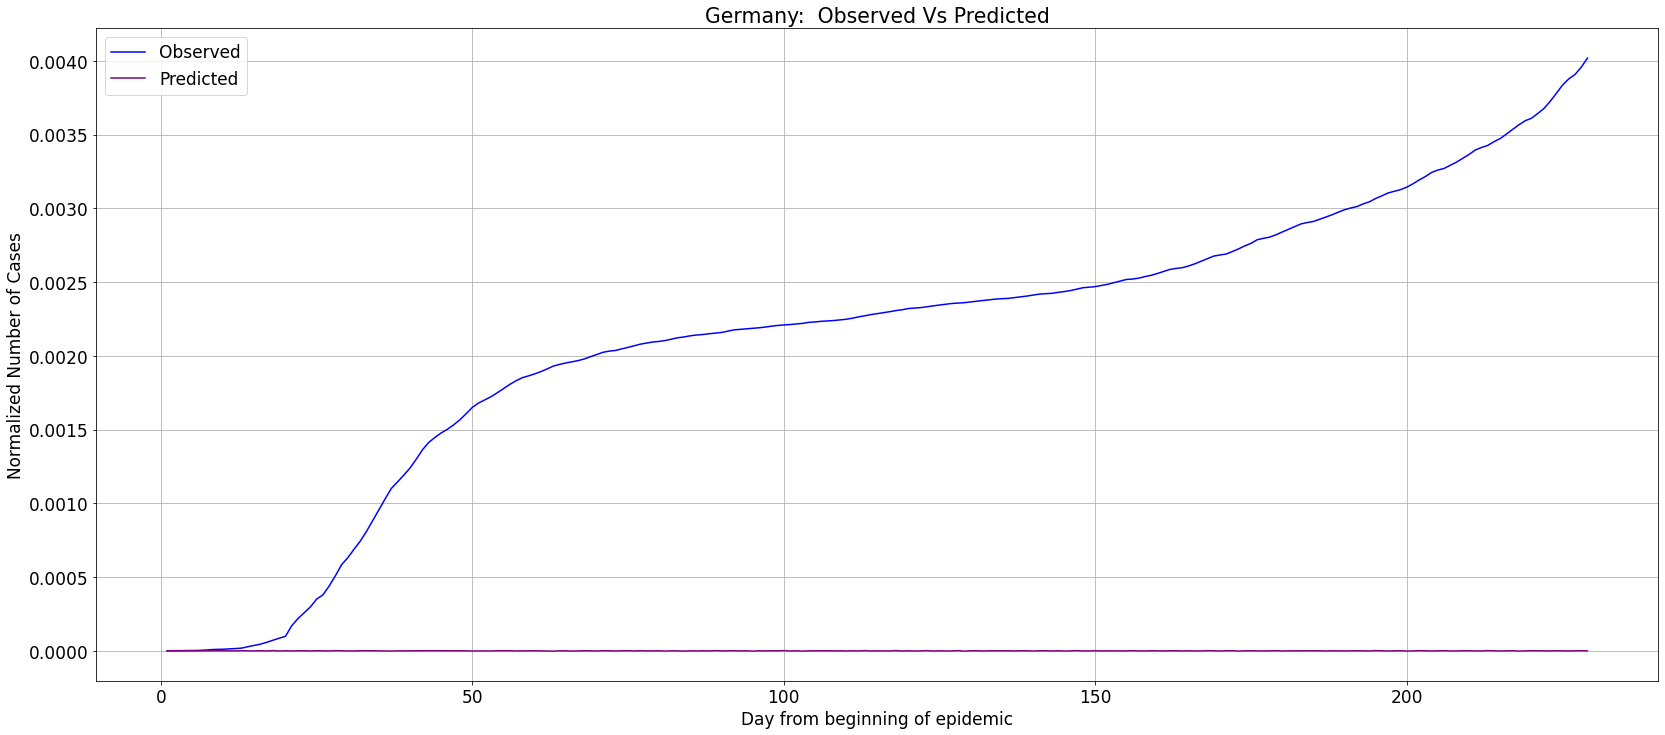

In [118]:
plt.figure()
plt.plot(x_int3,ger_norm_case[:229],color="blue", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [72]:
#Interval 4: 1 - 563

In [73]:
obv_y = ger_norm_case[:563]
linreg4 = c4 + r4 * x_int4
expit(linreg4)
exp_y = np.exp(linreg4)

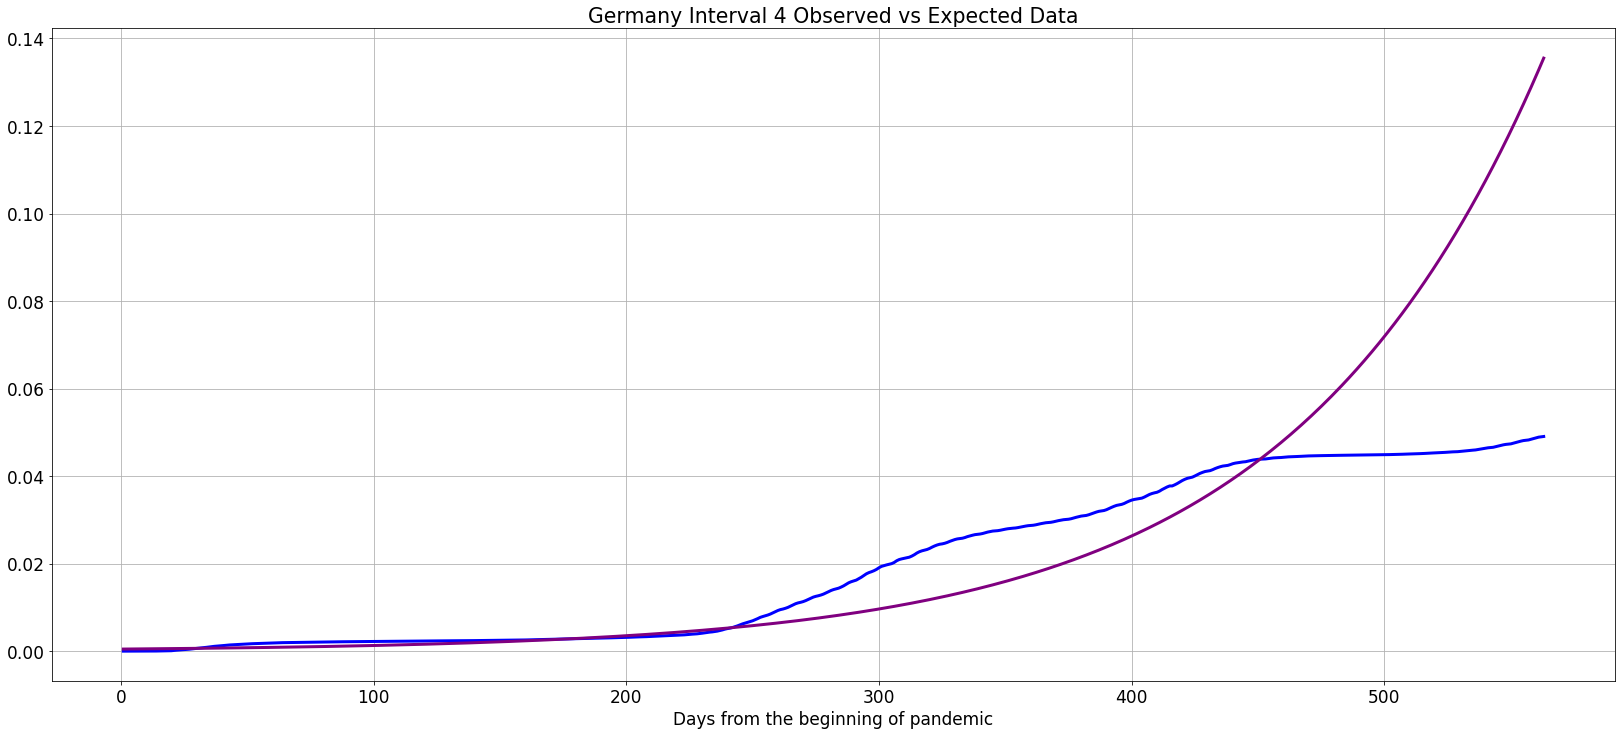

In [74]:
plt.plot(x_int4,obv_y,color="blue",linewidth=3.0)
plt.plot(x_int4,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Germany Interval 4 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [119]:
day_10 = ger['Cumulative_cases'][42]
R4 = day_10 / ger_pop
print(R4)
I4 = ger_new['Cumulative_cases'][1]/ger_pop - R4
print(I4)
S4 = 1- I4 - R4
print(S4)
Sign =S4
Sres= 1-Sign
Sexh = 1 - (Sign +Sres +I4 + R4)

1.802018260451706e-07
5.045651129264776e-07
0.9999993152330611


In [120]:
b=0.1
a4= r4+b
print(a4)

0.1100524454836806


In [121]:
def equations(t, y,a,b,k2,k3,k6):
    # Y[0] = S(t)
    # Y[1] = R(t)
    #Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = ger_norm_case[:563]
#inp.shape[0]

In [122]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I4, R4],args=(a4,b,k2,k3,k6), t_eval= x_int4)
sol.y

array([[ 9.99999315e-01,  9.99998746e-01,  9.99998171e-01, ...,
         9.89624356e-01,  9.89524277e-01,  9.89423282e-01],
       [ 6.84766939e-07,  1.17328777e-06,  1.65720747e-06, ...,
         4.41348086e-03,  4.45553671e-03,  4.49796649e-03],
       [-6.84766939e-07, -6.59449576e-07, -6.24708571e-07, ...,
         4.48361689e-03,  4.52718544e-03,  4.57116107e-03],
       [ 5.04565113e-07,  5.09662713e-07,  5.14811784e-07, ...,
         1.31499198e-04,  1.32741271e-04,  1.33994217e-04],
       [ 1.80201826e-07,  2.30912791e-07,  2.82136085e-07, ...,
         1.34704701e-03,  1.36025955e-03,  1.37359645e-03]])

In [123]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.1100524454836806 0.0005683896022550448


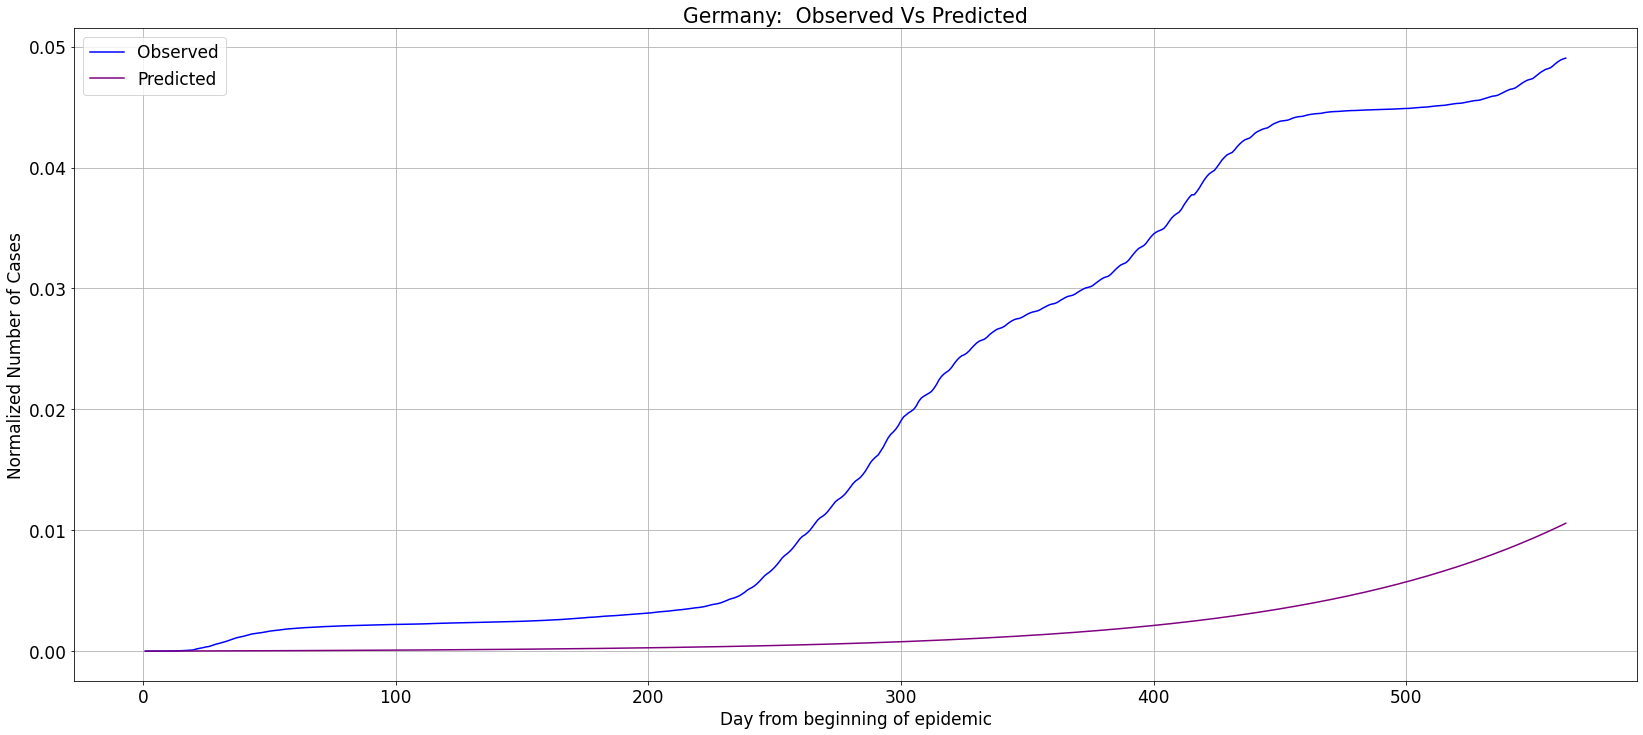

In [124]:
plt.figure()
plt.plot(x_int4,ger_norm_case[:574],color="blue", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

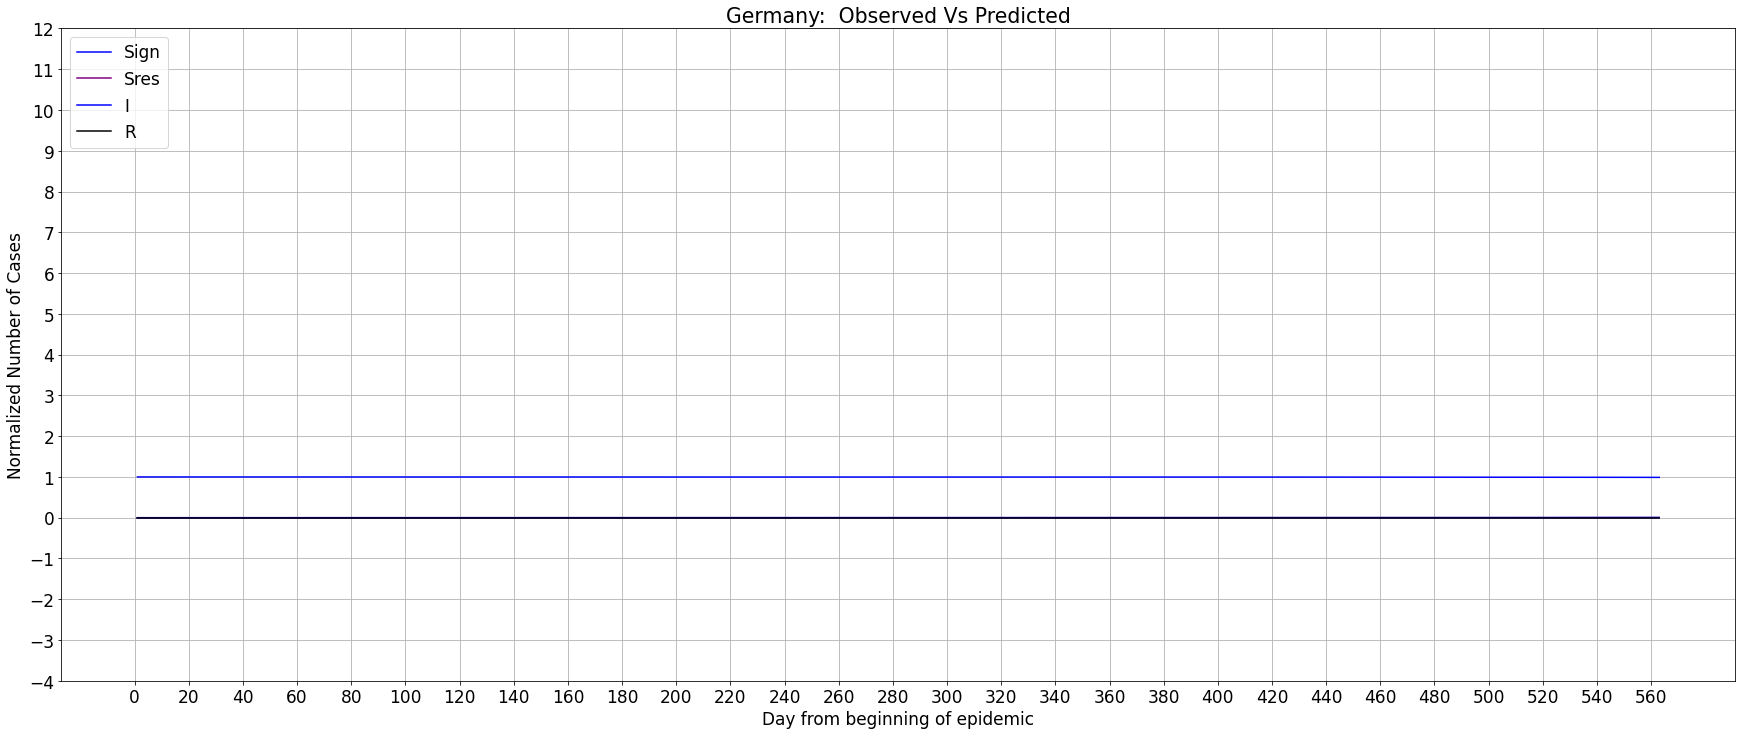

In [125]:
plt.figure()
plt.plot(x_int4,sol.y[0],color="blue", label = 'Sign')
plt.plot(x_int4,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int4,sol.y[2], color="blue",label = 'I')
plt.plot(x_int4,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(0,574,20))
plt.yticks(np.arange(-4,13,1))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [82]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I4, R4],args=(a4,b,k2,k3,k6), t_eval= x_int4)

In [83]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.1100524454836806 0.0006841221878386724


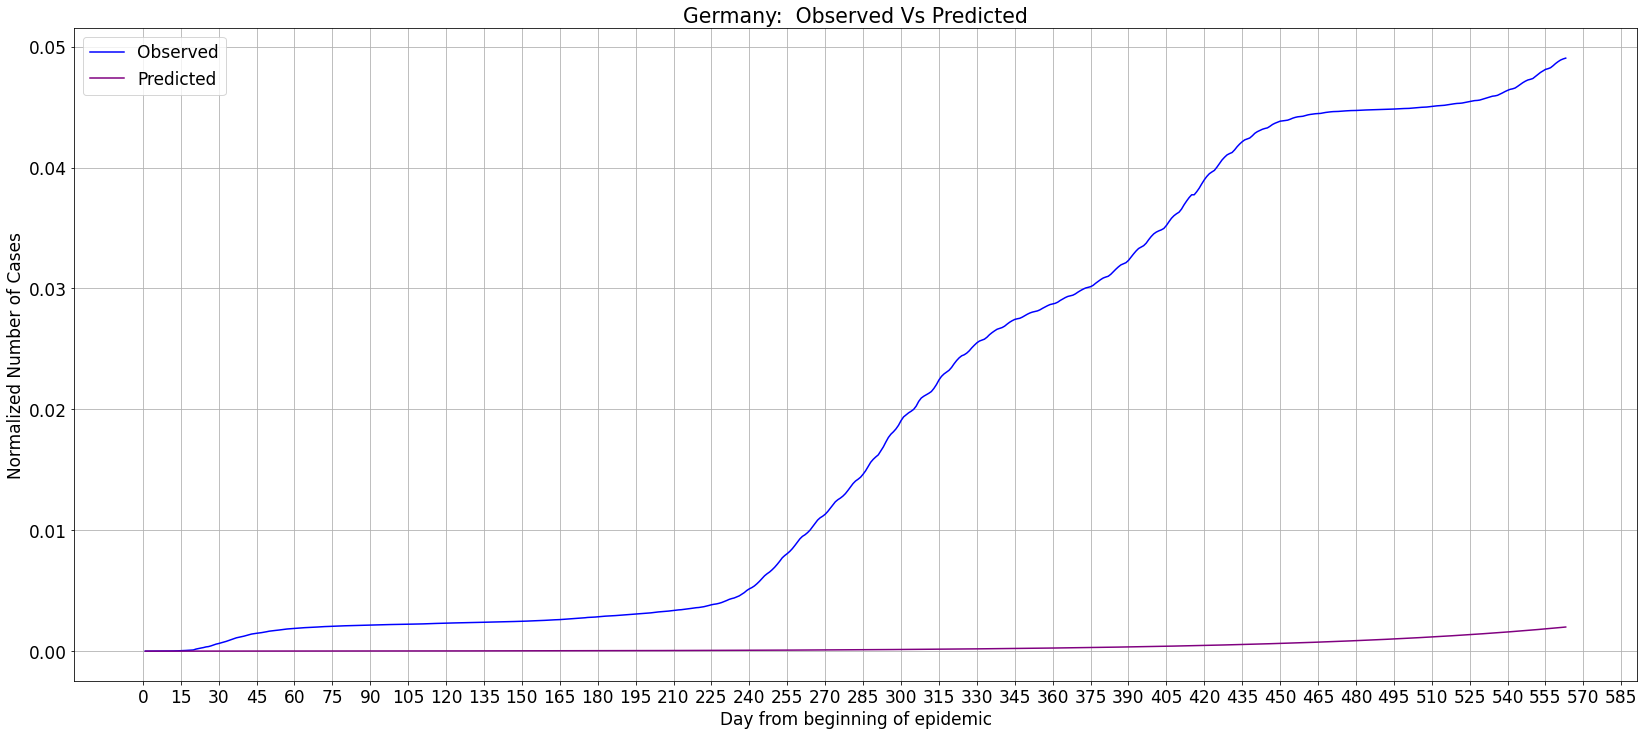

In [84]:
plt.figure()
plt.plot(x_int4,ger_norm_case[:563],color="blue", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(0,600,15))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [85]:
#crowd effect

In [126]:
k2 = 1
Ip = 0.02
q = k2/Ip
rate = q * Sign * Ip**2
print(rate)
print(q)
print(x_int1)

0.01999998630466122
50.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [127]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = ger_norm_case[:563]

In [128]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign,Sres,Sexh,I4, R4],args=(a4,b,k2,k3,k6), t_eval= x_int4)
#print(sol.y)

In [129]:
p = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(p - inp))

print(a4,MSE)
print(p)
#print(tur_norm_case[:29])

0.1100524454836806 0.0007123173950431388
[ 6.84766939e-07  7.12551757e-07  7.84684769e-07  8.89654788e-07
  8.50030670e-07  6.15552774e-07  2.65320029e-07  7.78993911e-09
  1.79452077e-07  5.78165422e-07  3.82141921e-07 -3.08958036e-08
  9.59701608e-07  1.11459773e-06 -8.25185227e-07  2.07496099e-07
  9.40048609e-08  4.34051310e-07  2.72073826e-07  4.19936793e-07
  2.01743010e-07  5.86805090e-07 -5.32946472e-07  1.75914988e-06
 -1.69850712e-06  3.52994375e-07  8.26502763e-07 -3.40563113e-07
  8.00645133e-08  1.03531937e-06  2.32064827e-07 -8.56086523e-07
  2.33939769e-07  2.12164024e-06  3.48044254e-07 -1.29714840e-06
 -1.01111116e-06 -5.87991520e-07 -4.29832516e-08  1.41463284e-06
  9.04607029e-07  7.59897260e-07  1.18045897e-06  1.85386147e-06
 -2.21822703e-07  3.97373912e-07  9.89046980e-07  1.62412768e-06
 -4.78148274e-07  4.74739408e-07  1.06194630e-06  2.34944699e-06
  6.26796176e-07  4.36427171e-07  2.58461851e-07  5.10859440e-07
 -5.34496490e-07 -1.19098057e-08  4.42556580e-07 

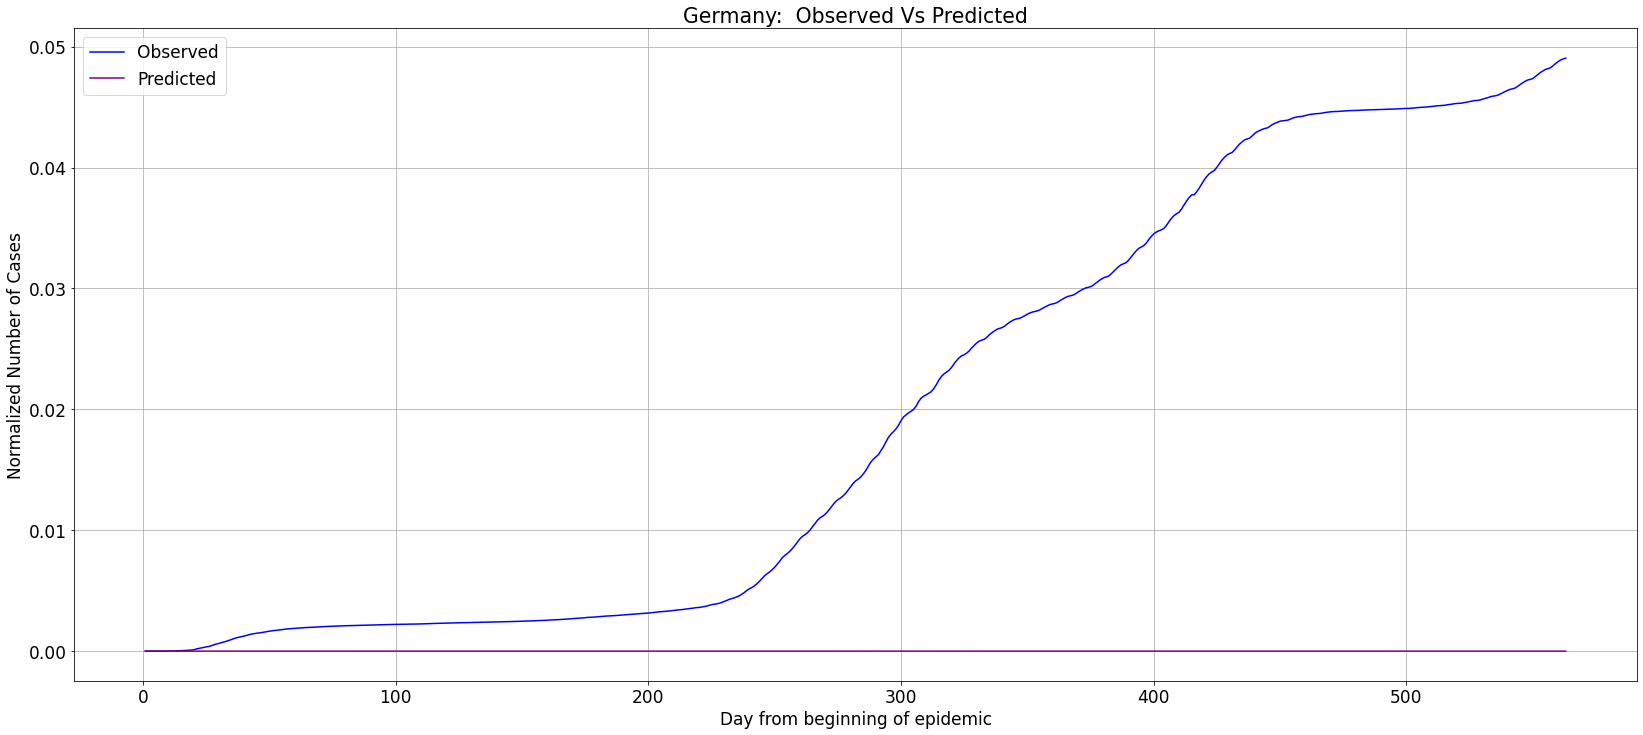

In [130]:
plt.figure()
plt.plot(x_int4,ger_norm_case[:563],color="blue", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Germany:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [91]:
#END

In [300]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = ger_norm_case[38:229]

In [301]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args = (a1,b,rate,k3,k6), t_eval=x_int2-38)
#print(sol.y)

In [297]:
p = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)
#print(tur_norm_case[:29])

0.10415179659396571 5.502630050611366e-06
[6.84766939e-07 8.51834885e-07 1.05105533e-06 1.28728014e-06
 1.56578779e-06 1.89226963e-06 2.27171060e-06 2.70395242e-06
 3.19797978e-06 3.76423331e-06 4.41272222e-06 5.15302429e-06
 5.99428587e-06 6.94522189e-06 8.01411588e-06 9.20881990e-06
 1.05367546e-05 1.20049093e-05 1.36198418e-05 1.53876784e-05
 1.73141142e-05 1.94044126e-05 2.16634058e-05 2.40954946e-05
 2.67019914e-05 2.94768395e-05 3.24220015e-05 3.55393856e-05
 3.88299720e-05 4.22938129e-05 4.59300322e-05 4.97368257e-05
 5.37114613e-05 5.78502784e-05 6.21486888e-05 6.66011757e-05
 7.12012946e-05 7.59416725e-05 8.08140086e-05 8.58090738e-05
 9.09167110e-05 9.61258350e-05 1.01424432e-04 1.06799562e-04
 1.12237353e-04 1.17723010e-04 1.23240805e-04 1.28774085e-04
 1.34305268e-04 1.39815843e-04 1.45286374e-04 1.50696492e-04
 1.56024904e-04 1.61249567e-04 1.66359358e-04 1.71354069e-04
 1.76232587e-04 1.80993884e-04 1.85637014e-04 1.90161118e-04
 1.94565420e-04 1.98849229e-04 2.03011939e-

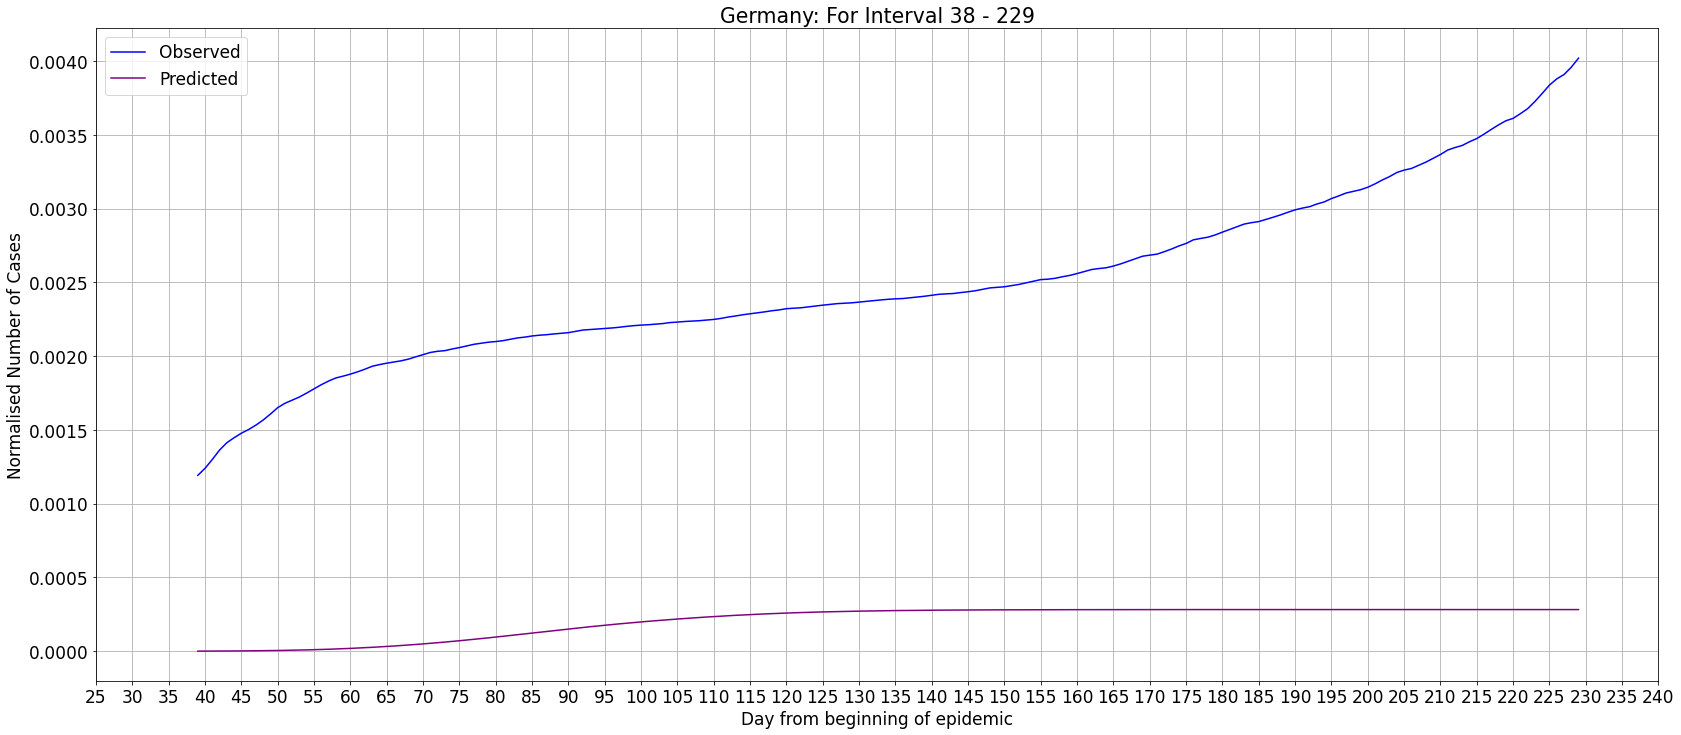

In [298]:
plt.figure()
plt.plot(x_int2,ger_norm_case[38:229],color="blue", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(25,245,5))
#plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Germany: For Interval 38 - 229')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [38]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a1 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[:38]

In [39]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S0, R0], t_eval=x_int1)

In [40]:
p = 1 - sol.y[0, :]
print(inp.values)
MSE = np.mean(np.square(p - inp))

print(a1,MSE)

[6.84766939e-07 1.33349351e-06 1.54973570e-06 1.88611245e-06
 2.35463719e-06 3.14752523e-06 4.80538203e-06 8.21720327e-06
 1.01753964e-05 1.08361365e-05 1.36833253e-05 1.55694378e-05
 1.88250841e-05 2.84598751e-05 3.67851994e-05 4.55910620e-05
 5.81210956e-05 7.22248919e-05 8.59682845e-05 9.84863047e-05
 1.69846228e-04 2.18488707e-04 2.57844786e-04 2.97621336e-04
 3.50937049e-04 3.79072561e-04 4.38587218e-04 5.08024988e-04
 5.83637674e-04 6.31271024e-04 6.88346949e-04 7.43789044e-04
 8.09298414e-04 8.83253244e-04 9.57424315e-04 1.03049015e-03
 1.10180202e-03 1.14597549e-03]
0.3021930219257103 4.8817163430179296e-08


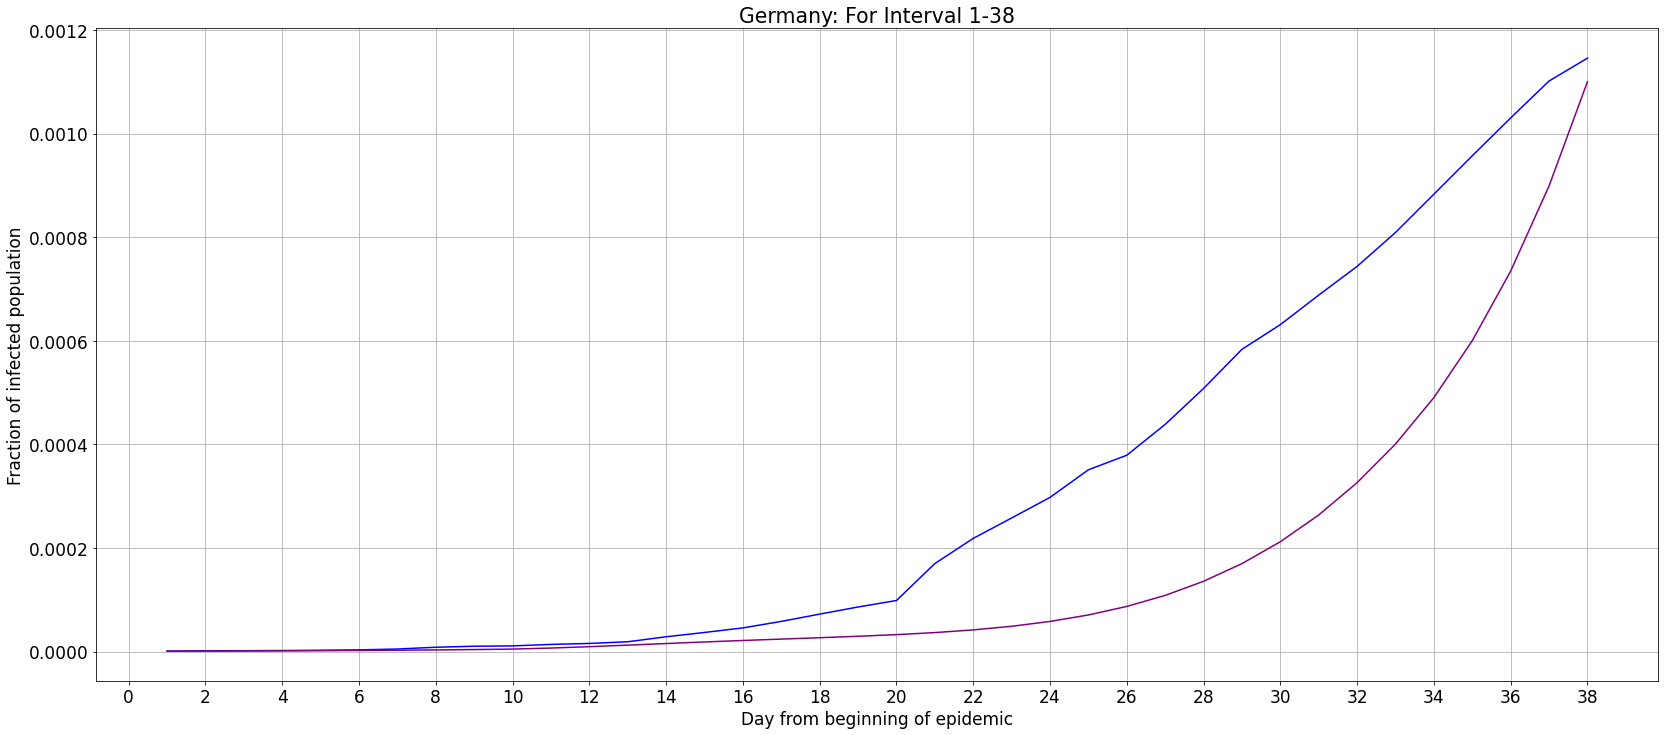

In [41]:
plt.figure()
plt.plot(x_int1, inp.values, color="blue", label = 'Observed')
plt.plot(x_int1, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,40,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1-38')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 2: 39 - 229

In [42]:
obv_y = ger_norm_case[38:229]

linreg = c2 + r2 * x_int2
expit(linreg)
exp_y = np.exp(linreg)

In [43]:
b=0.1
a2= r2+b
print(a2)

0.10415179659396571


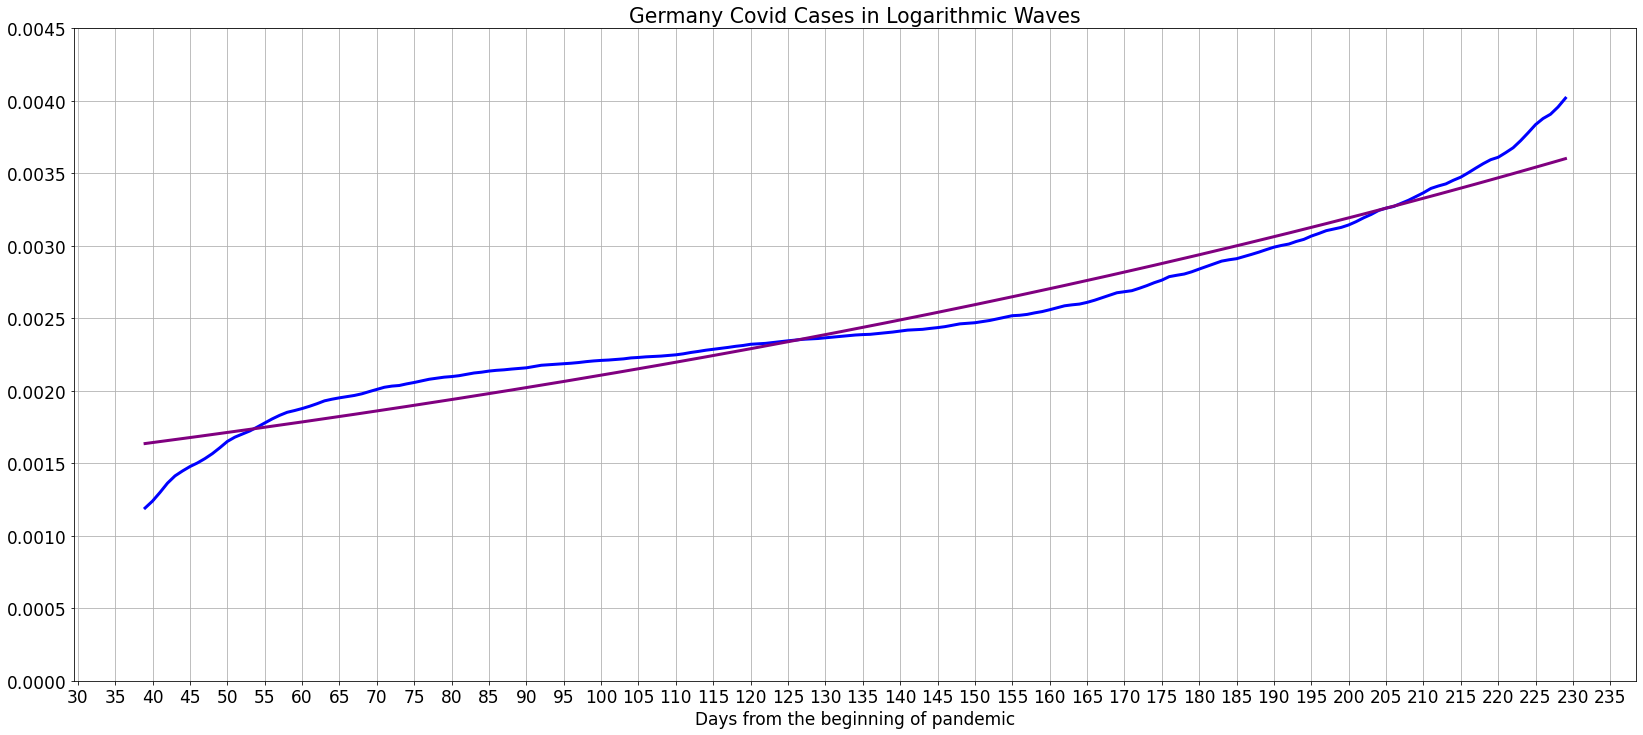

In [44]:
plt.plot(x_int2,obv_y,color="blue",linewidth=3.0)
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(30,240,5))
plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Germany Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

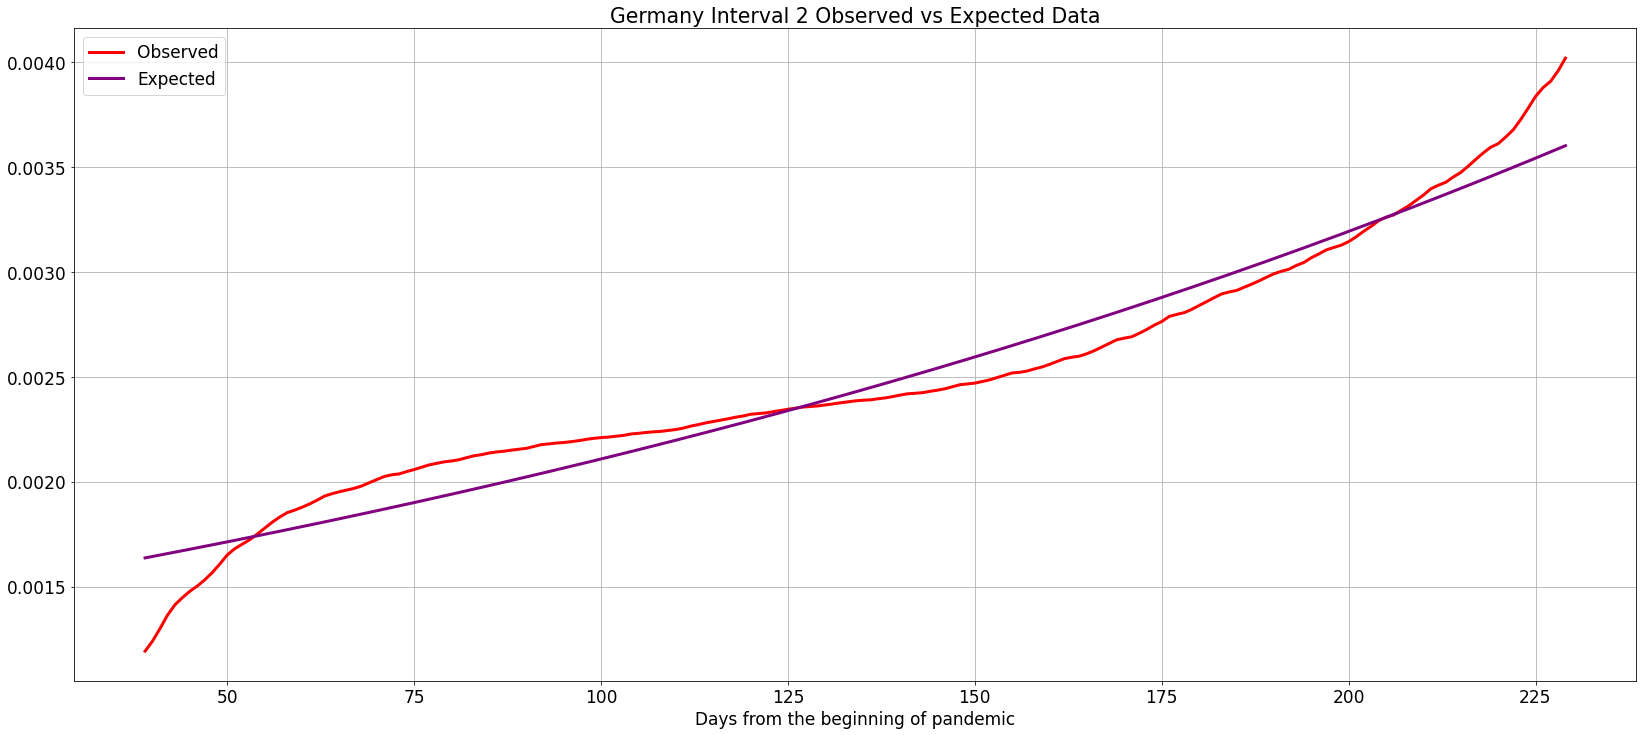

In [45]:
plt.plot(x_int2,obv_y,color="red",linewidth=3.0, label = "Observed")
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0, label = "Expected")

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Germany Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [46]:
day_10_ger = ger_new['Cumulative_cases'][25]
R1 = day_10_ger / ger_pop
print(R1)
I1 = ger_new['Cumulative_cases'][35]/ger_pop - R1
print(I1)
S1 = 1- I1 - R1
print(S1)
Sign = S1
print(Sign)
Sres = 0

0.0003509370494954349
0.0006064872657376261
0.999042575684767
0.999042575684767


In [47]:
b=0.1
a2= r2+b
print(a2)

0.10415179659396571


In [48]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a2 * y[0] * y[2] - k2 * y[0] * y[2] + k6 * Sexh
    dSresdt = k2 * y[0] * y[2] - k3 * y[1]
    dSexhdt = k3 * y[1] - a2 * Sexh * y[2] -k6 * Sexh
    
    dIdt = a2 * Sign + a2 * Sexh * y[2] - b * y[2]
    dRdt = b * y[2]
    
    return [dSigndt, dSresdt, dIdt, dRdt]
inp = ger_norm_case[38:229]
print(x_int2)

[ 39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229]


In [49]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres, I1, R1], t_eval= x_int2-38)


In [50]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)

0.10415179659396571 1.1236492364742459
[9.57424315e-04 5.59589406e-02 1.95899143e-01 3.74983730e-01
 5.52267583e-01 7.01017147e-01 8.12618808e-01 8.89506471e-01
 9.39144000e-01 9.69725510e-01 9.87814226e-01 9.98391587e-01
 1.00450764e+00 1.00810254e+00 1.01030740e+00 1.01174753e+00
 1.01279121e+00 1.01361547e+00 1.01434261e+00 1.01500935e+00
 1.01565738e+00 1.01630106e+00 1.01694087e+00 1.01758501e+00
 1.01823156e+00 1.01888499e+00 1.01955612e+00 1.02024285e+00
 1.02093017e+00 1.02159385e+00 1.02225597e+00 1.02294979e+00
 1.02368135e+00 1.02442932e+00 1.02514530e+00 1.02582435e+00
 1.02651694e+00 1.02723986e+00 1.02798701e+00 1.02872939e+00
 1.02943852e+00 1.03014856e+00 1.03087877e+00 1.03163092e+00
 1.03239004e+00 1.03312692e+00 1.03384729e+00 1.03457943e+00
 1.03533543e+00 1.03611172e+00 1.03688907e+00 1.03763680e+00
 1.03836779e+00 1.03911135e+00 1.03988041e+00 1.04067283e+00
 1.04147143e+00 1.04224450e+00 1.04299134e+00 1.04374435e+00
 1.04451866e+00 1.04531645e+00 1.04612692e+00 

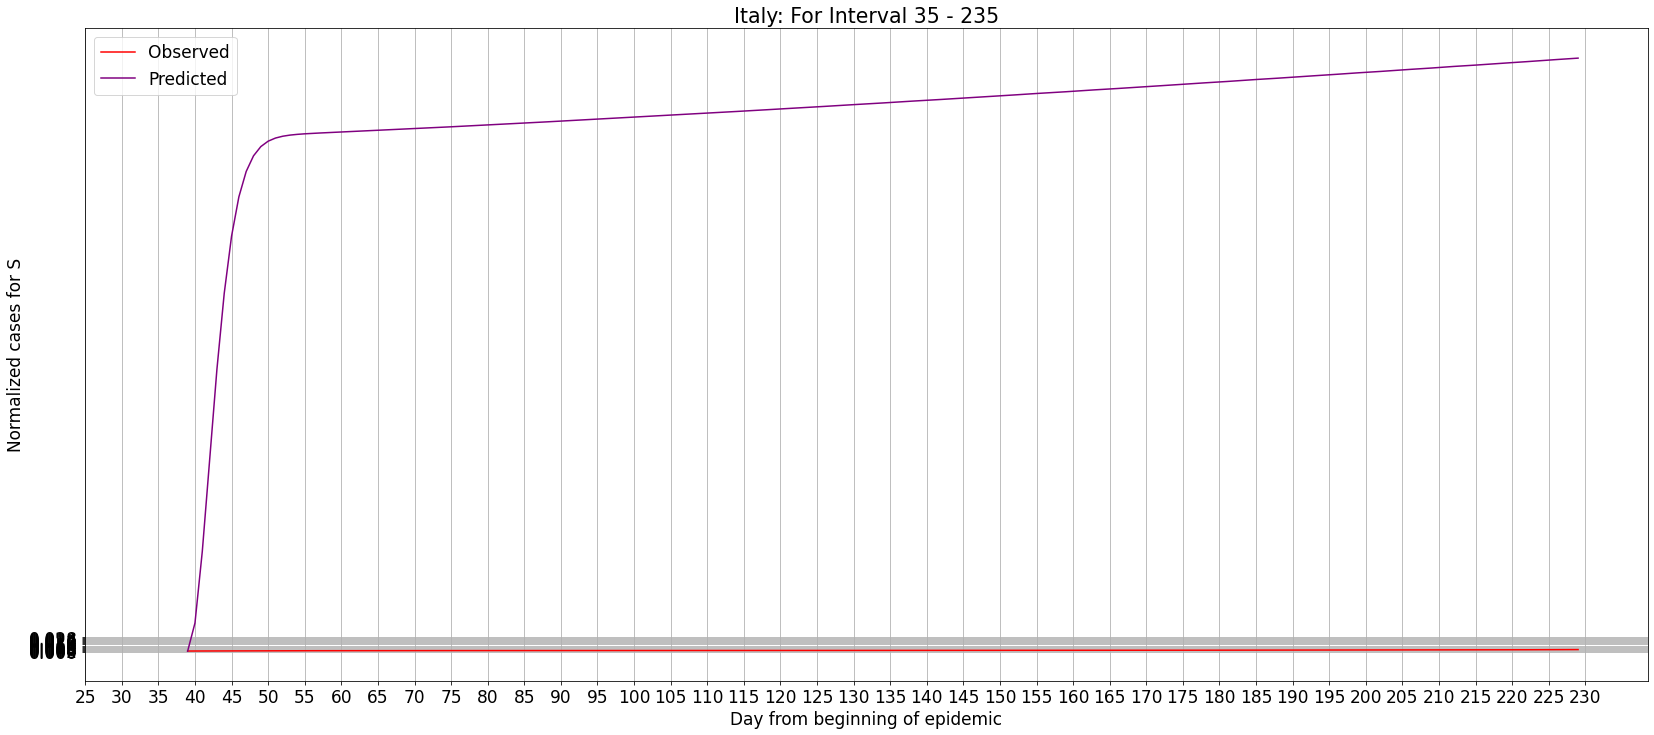

In [51]:
plt.figure()
plt.plot(x_int2,inp.values,color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(25,235,5))
plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.title('Italy: For Interval 35 - 235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

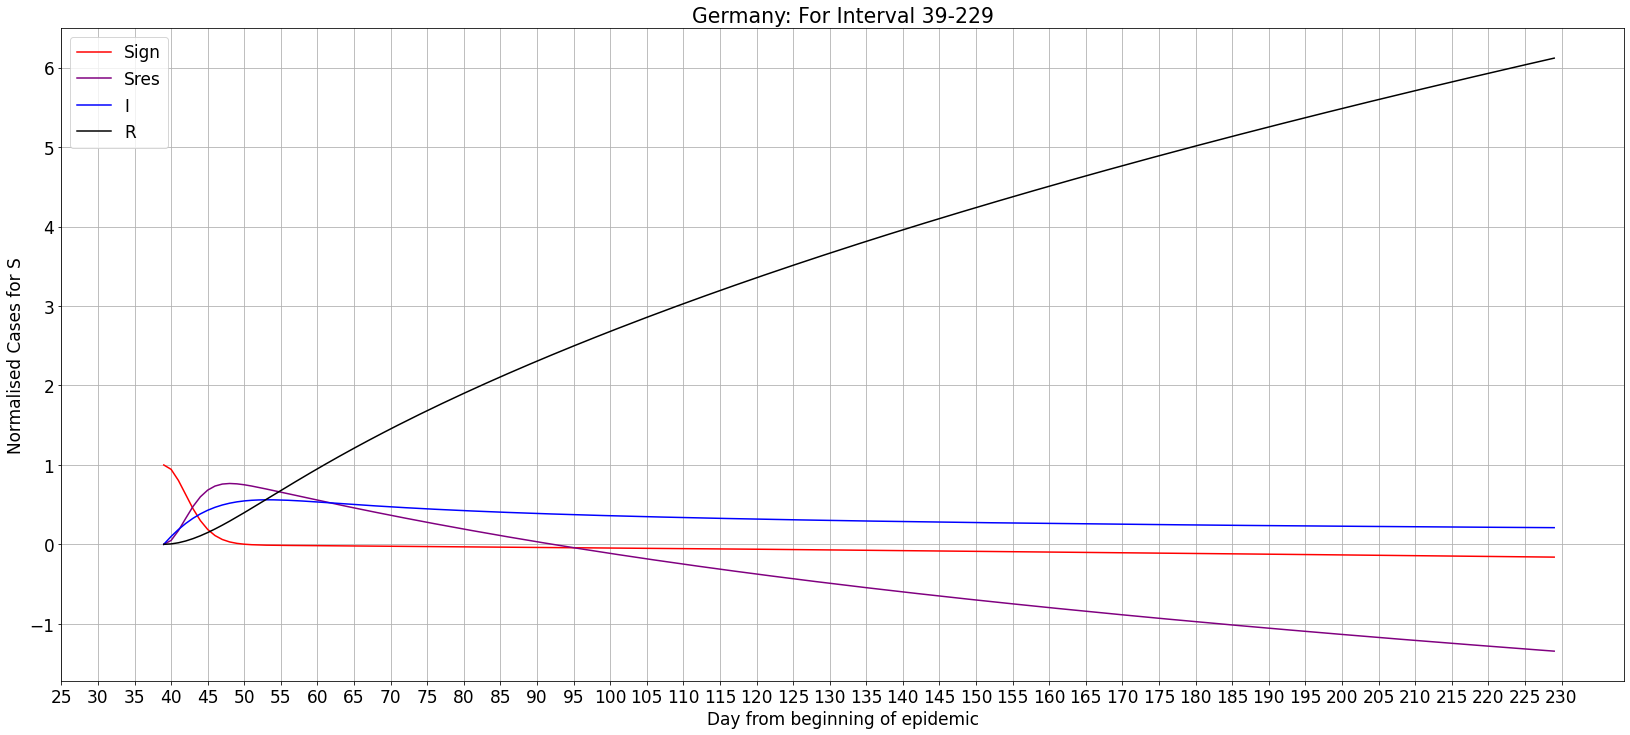

In [52]:
plt.figure()
plt.plot(x_int2,sol.y[0],color="red", label = 'Sign')
plt.plot(x_int2,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int2,sol.y[2], color="blue",label = 'I')
plt.plot(x_int2,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(25,235,5))
#plt.yticks(np.arange(0,2.5,0.25))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Cases for S')
plt.title('Germany: For Interval 39-229')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [53]:
k2 = 1
Ip1 = 0.001
q2 = k2/Ip1
rate = q2 * Sign * Ip1**2
print(rate)
print(q2)


0.000999042575684767
1000.0


In [54]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a2 * y[0] * y[2] - q2 * y[0] * y[2] + k6 * Sexh
    dSresdt = q2 * y[0] * y[2] - k3 * y[1]
    dSexhdt = k3 * y[1] - a2 * Sexh * y[2] -k6 * Sexh
    
    dIdt = a2 * Sign + a2 * Sexh * y[2] - b * y[2]
    dRdt = b * y[2]
    
    return [dSigndt, dSresdt, dIdt, dRdt]
inp = ger_norm_case[38:229]
print(x_int2)

[ 39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229]


In [55]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres, I1, R1], t_eval= x_int2-38)


In [56]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a2,MSE)
print(p)

0.10415179659396571 0.9899628159176762
[9.57424315e-04 1.00000910e+00 1.00000841e+00 1.00000897e+00
 1.00000871e+00 1.00000889e+00 1.00000931e+00 1.00001232e+00
 1.00001038e+00 1.00001086e+00 1.00001251e+00 1.00001333e+00
 1.00001354e+00 1.00001472e+00 1.00001397e+00 1.00001582e+00
 1.00001527e+00 1.00001647e+00 1.00001776e+00 1.00001950e+00
 1.00001828e+00 1.00001882e+00 1.00001813e+00 1.00001974e+00
 1.00002051e+00 1.00002237e+00 1.00002353e+00 1.00002184e+00
 1.00002452e+00 1.00002546e+00 1.00002561e+00 1.00002714e+00
 1.00002592e+00 1.00002869e+00 1.00002914e+00 1.00003026e+00
 1.00002971e+00 1.00003168e+00 1.00003350e+00 1.00003372e+00
 1.00003389e+00 1.00003400e+00 1.00003563e+00 1.00003771e+00
 1.00003650e+00 1.00003860e+00 1.00003726e+00 1.00003940e+00
 1.00004118e+00 1.00004117e+00 1.00004093e+00 1.00004240e+00
 1.00004518e+00 1.00004369e+00 1.00004606e+00 1.00004428e+00
 1.00004676e+00 1.00004819e+00 1.00004868e+00 1.00004818e+00
 1.00005112e+00 1.00005127e+00 1.00005163e+00 

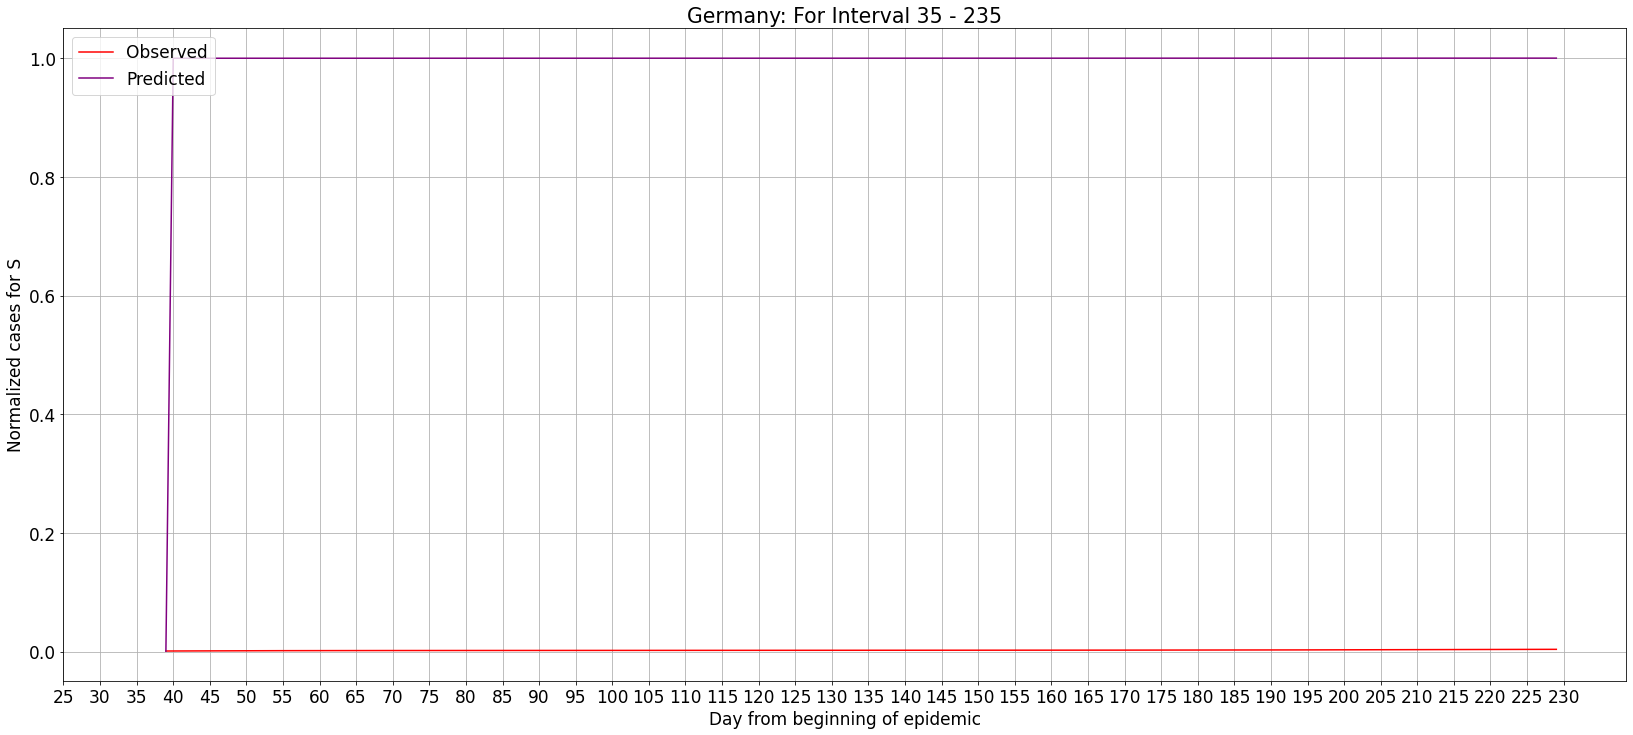

In [57]:
plt.figure()
plt.plot(x_int2,inp.values,color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(25,235,5))
#plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.title('Germany: For Interval 35 - 235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [58]:
def f(a):
    sol = solve_ivp(equations, [1, inp.shape[0]],[Sign,Sres, I1, R1], t_eval= x_int2-38) 
    p = 1 - sol.y[0, :]
    MSE = np.sum(np.square(p-inp))
    return MSE

In [60]:
a0 = 0.1
res = optimize.minimize(f,a0)
a = res.x
sol = solve_ivp(equations, [1, inp.shape[0]],[Sign,Sres, I1, R1], t_eval= x_int2-38)
# Compare solution with a with observed data
print(p)

NameError: name 'optimize' is not defined

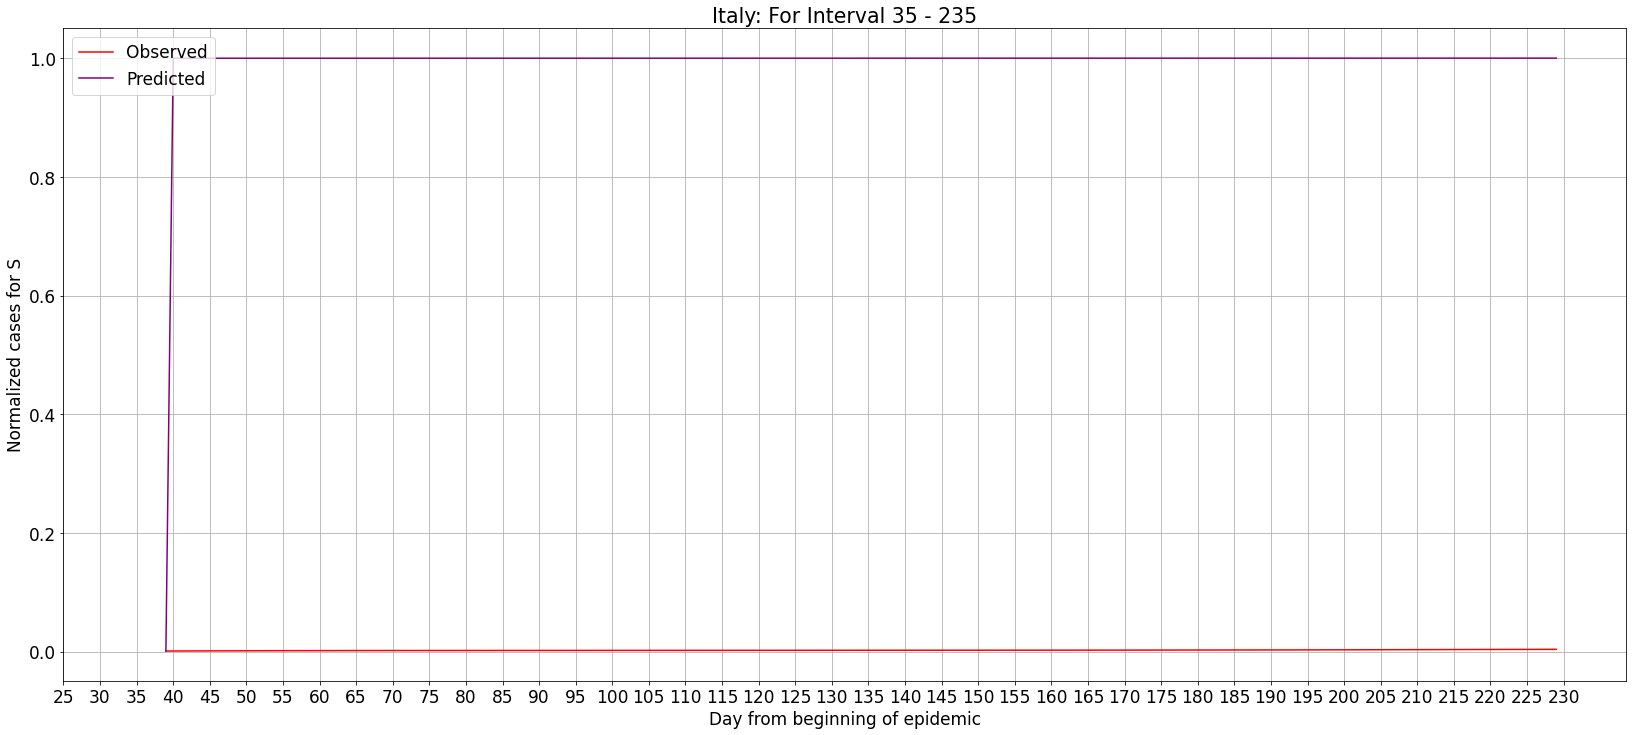

In [61]:
plt.figure()
plt.plot(x_int2,inp.values,color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(25,235,5))
#plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.title('Italy: For Interval 35 - 235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [62]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger_new['Cumulative_cases'][29]
R2 = day_10 / ger_pop
print(R2)
I2 = ger_new['Cumulative_cases'][29]/ger_pop - R2
print(I2)
S2 = 1- I2 - R2
print(S2)

0.0005836376741950985
0.0
0.9994163623258049


In [63]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a2 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[38:229]

In [64]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S2, R2], t_eval=x_int2-38)

In [65]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))
print(p)
print(a2,MSE)

[0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364
 0.00058364 0.00058364 0.00058364 0.00058364 0.00058364 0.0005

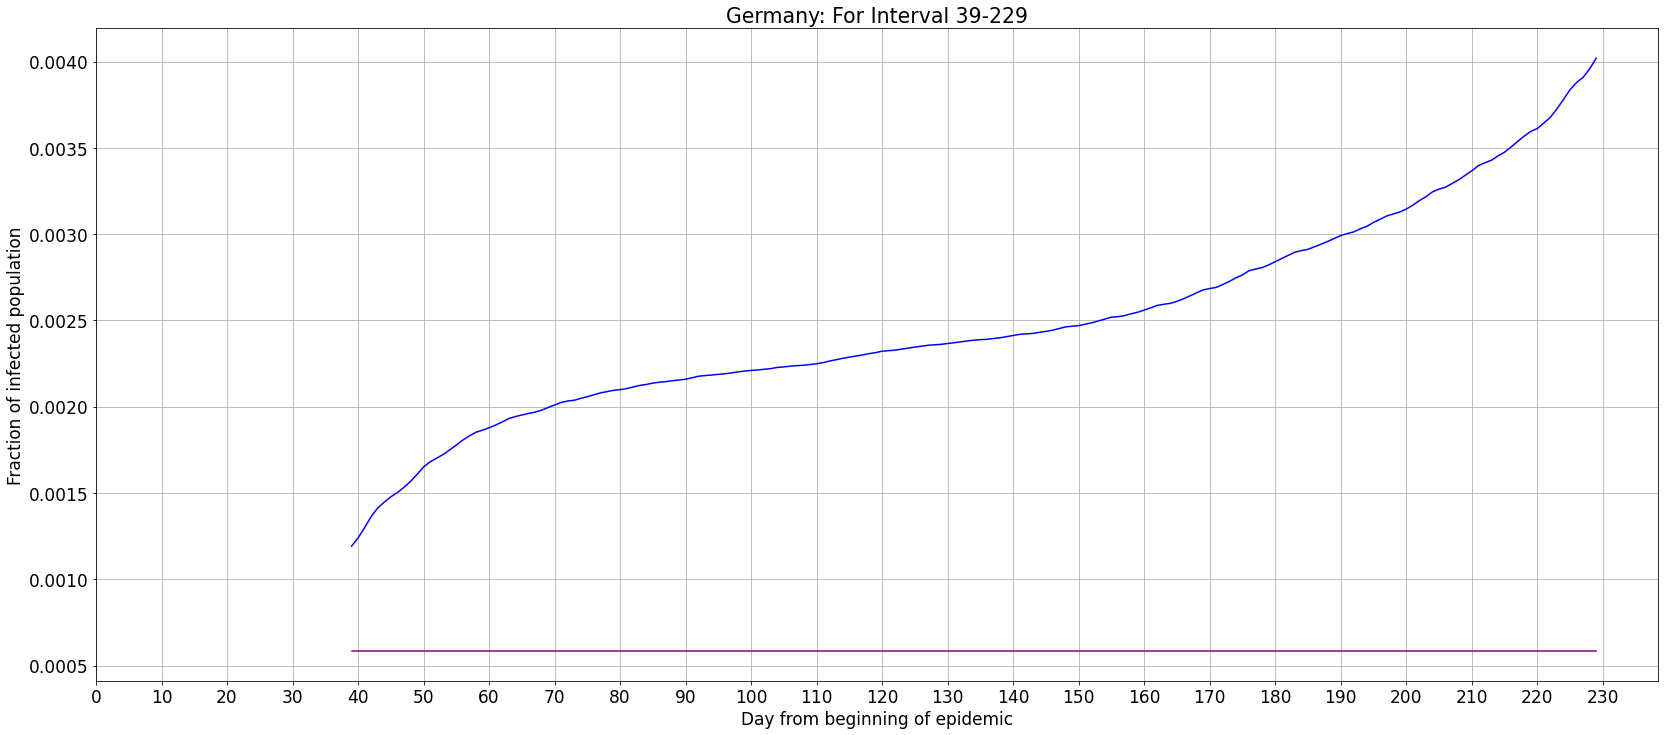

In [66]:
plt.figure()
plt.plot(x_int2, inp.values, color="blue", label = 'Observed')
plt.plot(x_int2, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,240,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 39-229')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 3: 1 - 229

In [67]:
obv_y = ger_norm_case[:229]

linreg = c3 + r3 * x_int3
expit(linreg)
exp_y = np.exp(linreg)

In [68]:
b=0.1
a3= r3+b
print(a3)

0.11623513349779421


In [69]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger['Cumulative_cases'][48]
R3 = day_10 / ger_pop
print(R3)
I3 = ger_new['Cumulative_cases'][1]/ger_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)
Sign = S3
Sres = 1- Sign
Sexh = 1- (Sign +Sres +I3+R3)

1.802018260451706e-07
5.045651129264776e-07
0.9999993152330611


In [70]:
b=0.1
a3= r3+b
print(a3)

0.11623513349779421


In [71]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a3 * y[0] * y[2] - k2 * y[0] * y[2] + k6 * Sexh
    dSresdt = k2 * y[0] * y[2] - k3 * y[1]
    dSexhdt = k3 * y[1] - a3 * Sexh * y[2] -k6 * Sexh
    
    dIdt = a3 * Sign + a3 * Sexh * y[2] - b * y[2]
    dRdt = b * y[2]
    
    return [dSigndt, dSresdt, dIdt, dRdt]
inp = ger_norm_case[:229]

In [72]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,I3,R3], t_eval= x_int3)

In [73]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a3,MSE)
print(p)

0.11623513349779421 1.171433410341442
[6.84766939e-07 6.12502637e-02 2.15990853e-01 4.09435214e-01
 5.93124780e-01 7.40914289e-01 8.46256945e-01 9.14925667e-01
 9.56940753e-01 9.81293296e-01 9.95125707e-01 1.00282604e+00
 1.00715632e+00 1.00968898e+00 1.01127368e+00 1.01237148e+00
 1.01322725e+00 1.01396339e+00 1.01464055e+00 1.01530160e+00
 1.01595031e+00 1.01660006e+00 1.01725423e+00 1.01791682e+00
 1.01859225e+00 1.01927485e+00 1.01994848e+00 1.02062256e+00
 1.02132149e+00 1.02204533e+00 1.02276889e+00 1.02346035e+00
 1.02415257e+00 1.02487058e+00 1.02561354e+00 1.02635536e+00
 1.02706432e+00 1.02777275e+00 1.02850414e+00 1.02925955e+00
 1.03001837e+00 1.03074682e+00 1.03146525e+00 1.03220222e+00
 1.03296542e+00 1.03374294e+00 1.03450335e+00 1.03523308e+00
 1.03596798e+00 1.03672749e+00 1.03751282e+00 1.03830688e+00
 1.03907509e+00 1.03981553e+00 1.04056411e+00 1.04133812e+00
 1.04213807e+00 1.04294762e+00 1.04373381e+00 1.04448772e+00
 1.04524582e+00 1.04602786e+00 1.04683780e+00 1

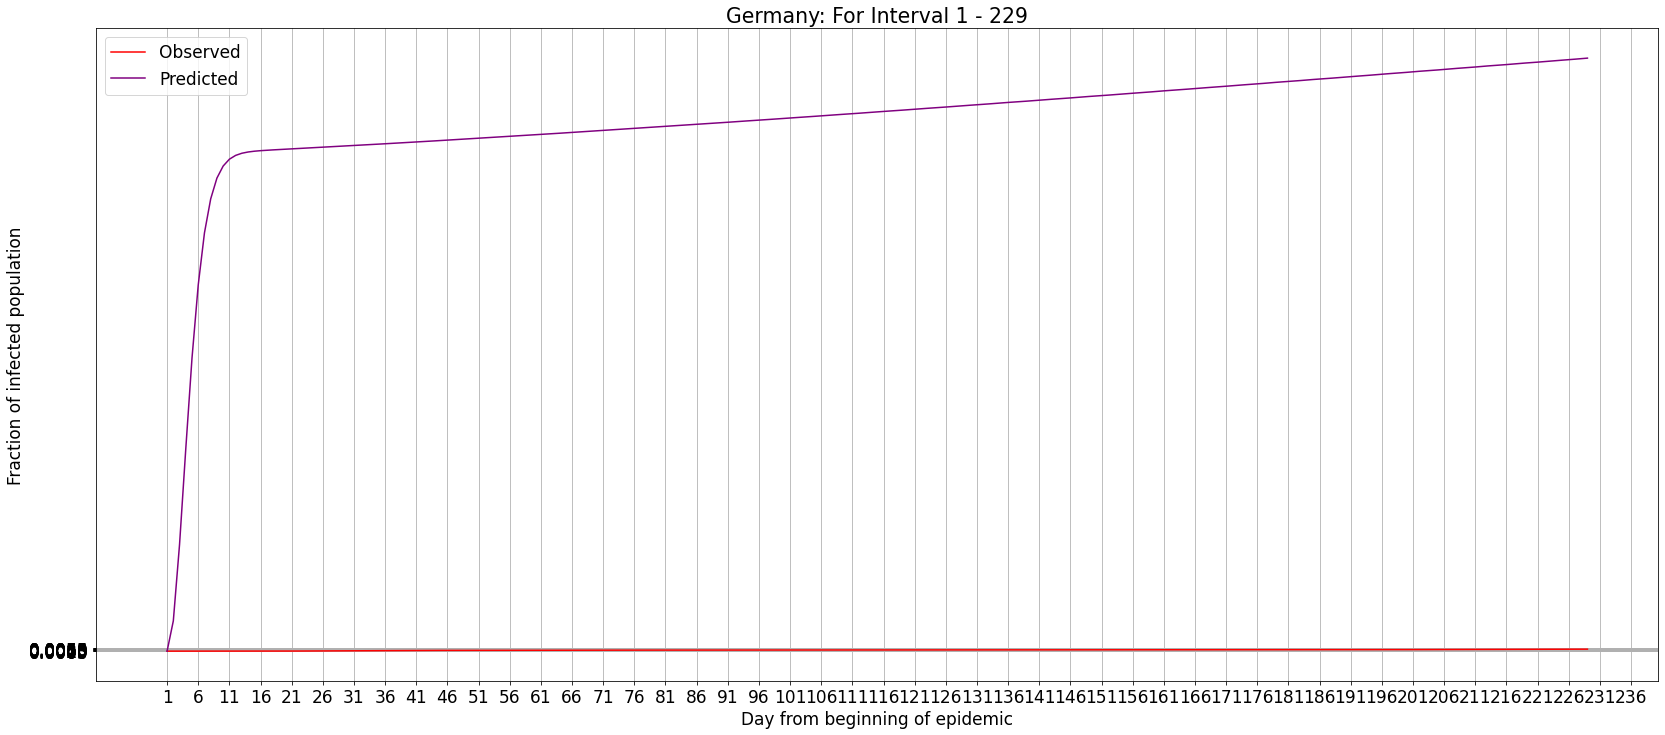

In [74]:
plt.figure()
plt.plot(x_int3,inp.values,color="red", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(1,238,5))
plt.yticks(np.arange(0,0.007,0.0005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1 - 229')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

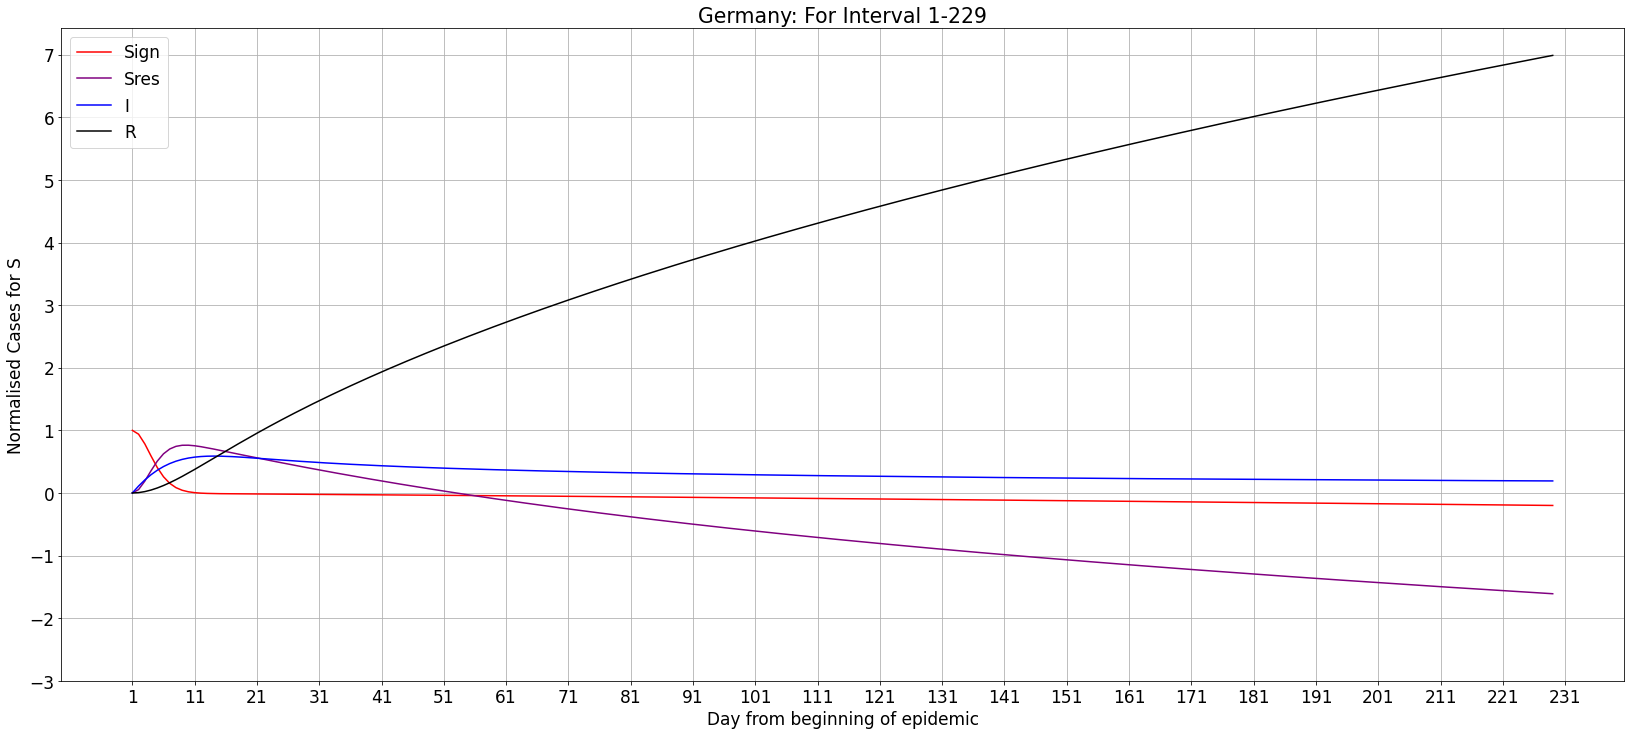

In [75]:
plt.figure()
plt.plot(x_int3,sol.y[0],color="red", label = 'Sign')
plt.plot(x_int3,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int3,sol.y[2], color="blue",label = 'I')
plt.plot(x_int3,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(1,240,10))
plt.yticks(np.arange(-3,8,1))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Cases for S')
plt.title('Germany: For Interval 1-229')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [76]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a3 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[:229]

In [77]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S3, R3], t_eval=x_int3)

In [78]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a3,MSE)

0.11623513349779421 5.312305287535256e-06


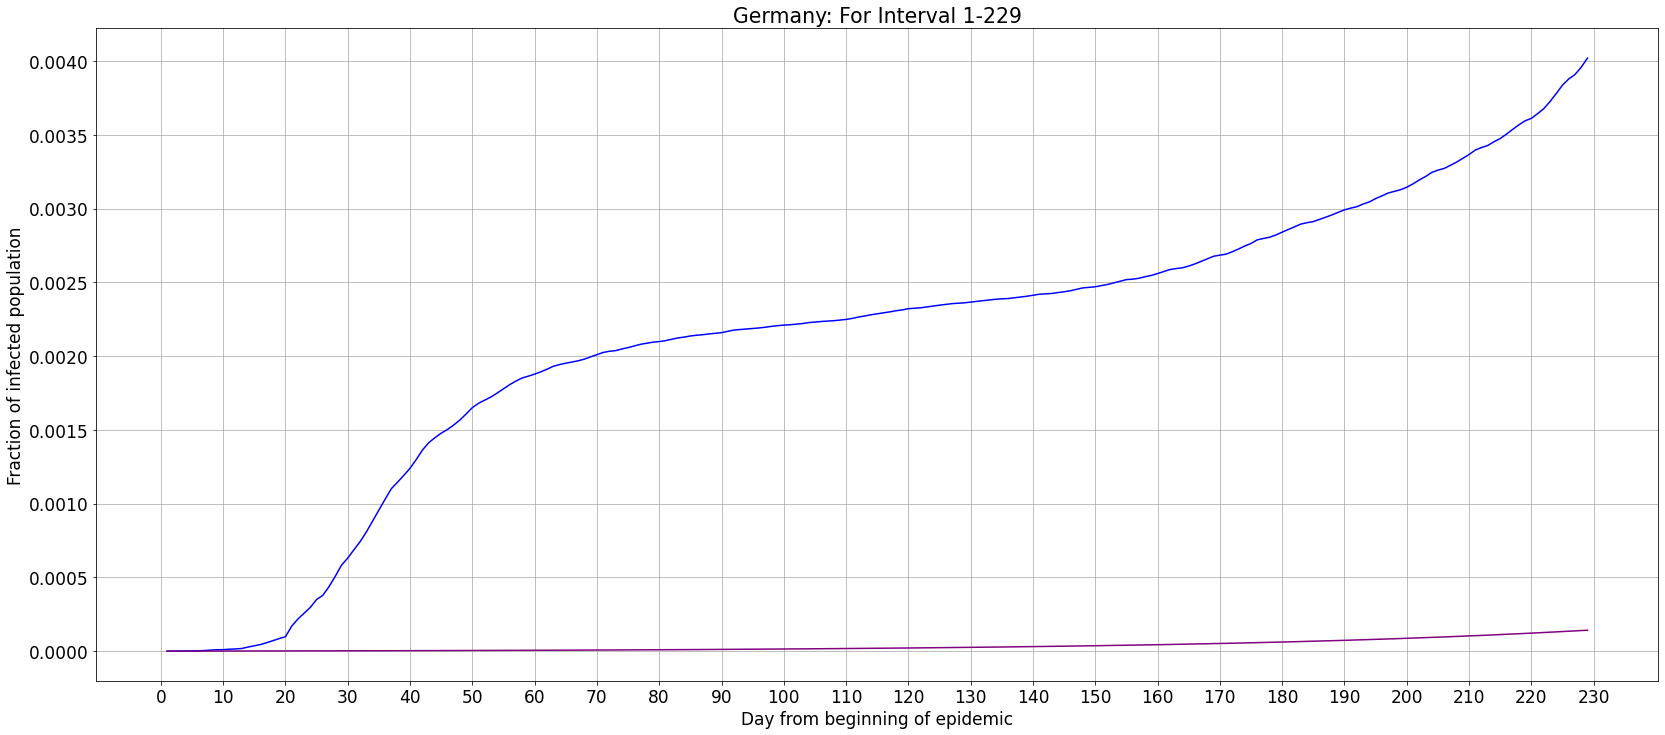

In [79]:
plt.figure()
plt.plot(x_int3, inp.values, color="blue", label = 'Observed')
plt.plot(x_int3, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,240,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1-229')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 4: 1 - 563

In [80]:
b=0.1
a4= r4+b
print(a4)

0.1100524454836806


In [81]:
#10 days before start or epidemic would be 48th day in original data

day_10 = ger['Cumulative_cases'][48]
R4 = day_10 / ger_pop
print(R4)
I4 = ger_new['Cumulative_cases'][1]/ger_pop - R4
print(I4)
S4 = 1- I4 - R4
print(S4)
Sign =S4
Sres= 1-Sign

1.802018260451706e-07
5.045651129264776e-07
0.9999993152330611


In [82]:
b=0.1
a4= r4+b
print(a4)

0.1100524454836806


In [83]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a4 * y[0] * y[2] - k2 * y[0] * y[2] + k6 * Sexh
    dSresdt = k2 * y[0] * y[2] - k3 * y[1]
    dSexhdt = k3 * y[1] - a4 * Sexh * y[2] -k6 * Sexh
    
    dIdt = a4 * Sign + a4 * Sexh * y[2] - b * y[2]
    dRdt = b * y[2]
    
    return [dSigndt, dSresdt, dIdt, dRdt]
inp = ger_norm_case[:563]
inp.shape[0]

563

In [84]:
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,I4, R4], t_eval= x_int4)
sol.y[0]

array([ 9.99999315e-01,  9.42209624e-01,  7.95067968e-01,  6.08585894e-01,
        4.27920648e-01,  2.79195948e-01,  1.70365413e-01,  9.73467951e-02,
        5.15303524e-02,  2.41016346e-02,  8.23178757e-03, -8.12447858e-04,
       -5.97816294e-03, -8.99144655e-03, -1.08477486e-02, -1.21023379e-02,
       -1.30309490e-02, -1.38103486e-02, -1.45023984e-02, -1.51653108e-02,
       -1.58151860e-02, -1.64574622e-02, -1.71053963e-02, -1.77573281e-02,
       -1.84198141e-02, -1.90941996e-02, -1.97730312e-02, -2.04410630e-02,
       -2.11155504e-02, -2.18158096e-02, -2.25383774e-02, -2.32570044e-02,
       -2.39445992e-02, -2.46351969e-02, -2.53512894e-02, -2.60919028e-02,
       -2.68329270e-02, -2.75418983e-02, -2.82471623e-02, -2.89734360e-02,
       -2.97244075e-02, -3.04838132e-02, -3.12181919e-02, -3.19344218e-02,
       -3.26639666e-02, -3.34189451e-02, -3.41934797e-02, -3.49636966e-02,
       -3.57002996e-02, -3.64294885e-02, -3.71771693e-02, -3.79516362e-02,
       -3.87444339e-02, -

In [85]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.1100524454836806 1.5419447932383867


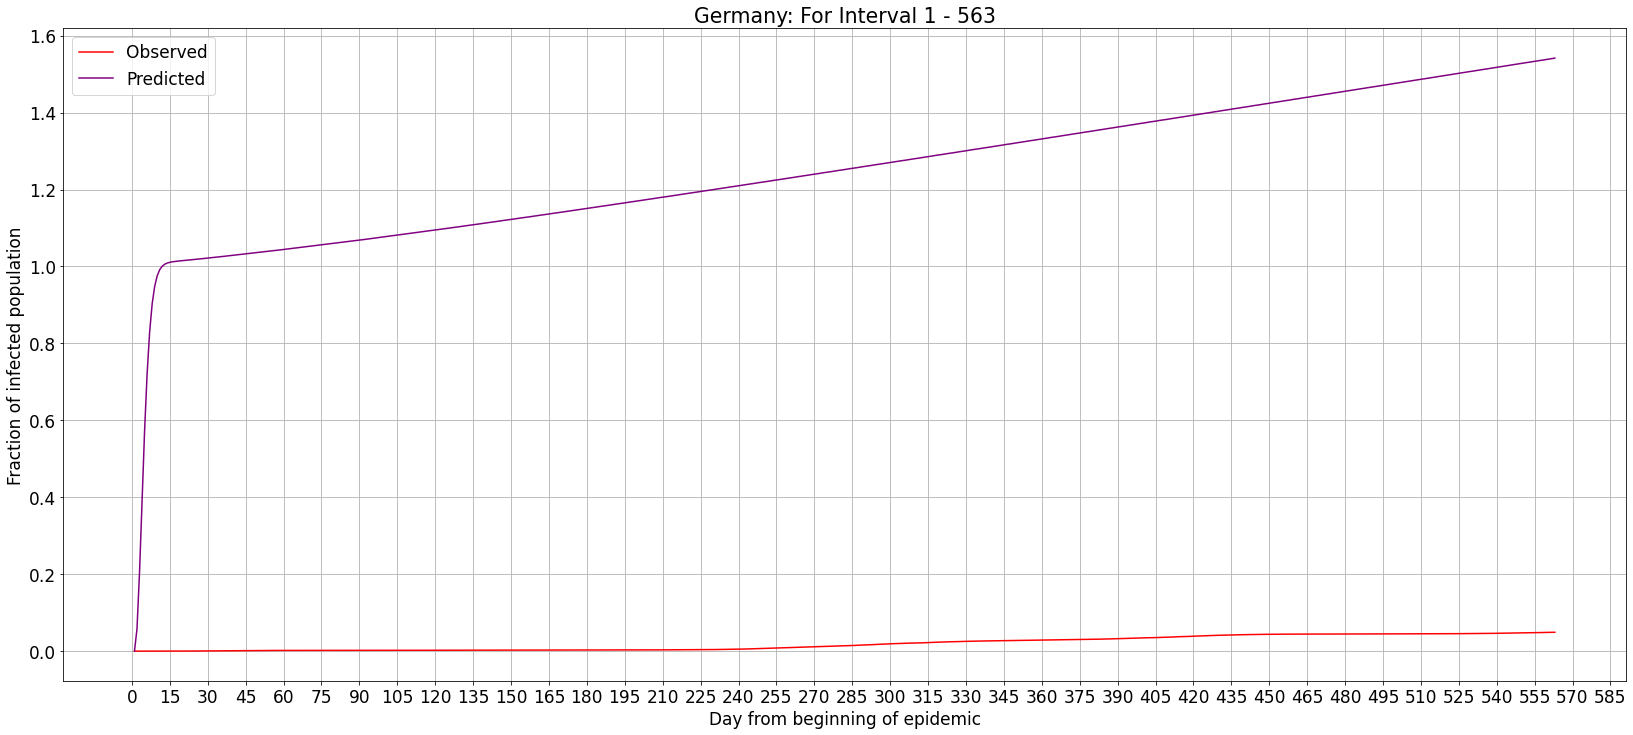

In [86]:
plt.figure()
plt.plot(x_int4,inp.values,color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(0,600,15))
#plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1 - 563')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

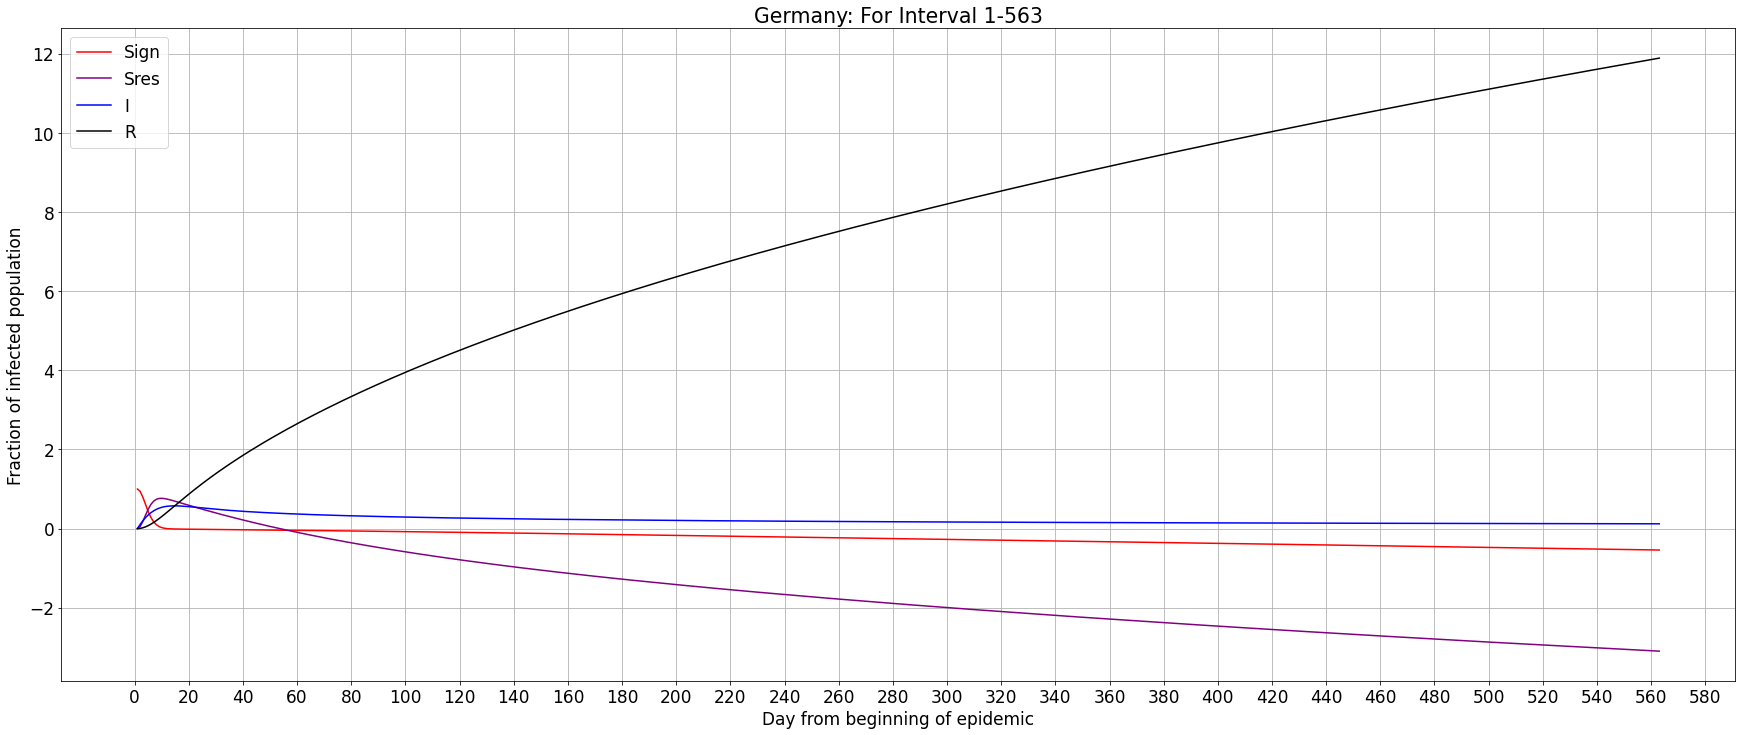

In [87]:
plt.figure()
plt.plot(x_int4,sol.y[0],color="red", label = 'Sign')
plt.plot(x_int4,sol.y[1], color="purple",label = 'Sres')
#plt.plot(x_int1,dSexhdt, color="green",label = 'Sexh')
plt.plot(x_int4,sol.y[2], color="blue",label = 'I')
plt.plot(x_int4,sol.y[3], color="black",label = 'R')
plt.xticks(np.arange(0,600,20))
#plt.yticks(np.arange(0,2.5,0.25))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1-563')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [88]:
k2 = 1
Ip = 0.02
q1 = k2/Ip
rate = q1 * Sign * Ip**2
print(rate)
print(x_int4)

0.01999998630466122
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 24

In [89]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    Sexh = 1 -y[0]-y[1] - y[2] - y[3]
    
    dSigndt = -a4 * y[0] * y[2] - q1 * y[0] * y[2] + k6 * Sexh
    dSresdt = q1 * y[0] * y[2] - k3 * y[1]
    dSexhdt = k3 * y[1] - a4 * Sexh * y[2] -k6 * Sexh
    
    dIdt = a4 * Sign + a4 * Sexh * y[2] - b * y[2]
    dRdt = b * y[2]
    
    return [dSigndt, dSresdt, dIdt, dRdt]
inp = ger_norm_case[:563]
inp.shape[0]


563

In [90]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,I4, R4], t_eval= x_int4)
sol.y[0]

array([ 9.99999315e-01,  6.95993999e-02, -1.51339528e-04, -1.90755416e-04,
       -1.98105199e-04, -2.07464913e-04, -2.13426952e-04, -2.22633723e-04,
       -2.34325621e-04, -2.44136138e-04, -2.52309579e-04, -2.62276193e-04,
       -2.74460870e-04, -2.86636050e-04, -2.97363149e-04, -3.12209836e-04,
       -3.22018793e-04, -3.36326460e-04, -3.47716219e-04, -3.64042897e-04,
       -3.76324614e-04, -3.90769899e-04, -4.03749649e-04, -4.18754685e-04,
       -4.32925061e-04, -4.49358087e-04, -4.66319438e-04, -4.78819590e-04,
       -4.95904249e-04, -5.08576287e-04, -5.29059734e-04, -5.42629492e-04,
       -5.57517834e-04, -5.72951335e-04, -5.88234993e-04, -6.04745927e-04,
       -6.22616878e-04, -6.38944439e-04, -6.53520895e-04, -6.69095700e-04,
       -6.88979746e-04, -7.01551136e-04, -7.19747098e-04, -7.34796593e-04,
       -7.52039770e-04, -7.69175403e-04, -7.85642834e-04, -8.02084110e-04,
       -8.16643581e-04, -8.34229198e-04, -8.49430342e-04, -8.66663845e-04,
       -8.84452560e-04, -

In [91]:
p = 1 - sol.y[0, :]

MSE = np.mean(np.square(p - inp))

print(a4,MSE)
print(p)
print(inp.values)

0.1100524454836806 0.9706662212771727
[6.84766939e-07 9.30400600e-01 1.00015134e+00 1.00019076e+00
 1.00019811e+00 1.00020746e+00 1.00021343e+00 1.00022263e+00
 1.00023433e+00 1.00024414e+00 1.00025231e+00 1.00026228e+00
 1.00027446e+00 1.00028664e+00 1.00029736e+00 1.00031221e+00
 1.00032202e+00 1.00033633e+00 1.00034772e+00 1.00036404e+00
 1.00037632e+00 1.00039077e+00 1.00040375e+00 1.00041875e+00
 1.00043293e+00 1.00044936e+00 1.00046632e+00 1.00047882e+00
 1.00049590e+00 1.00050858e+00 1.00052906e+00 1.00054263e+00
 1.00055752e+00 1.00057295e+00 1.00058823e+00 1.00060475e+00
 1.00062262e+00 1.00063894e+00 1.00065352e+00 1.00066910e+00
 1.00068898e+00 1.00070155e+00 1.00071975e+00 1.00073480e+00
 1.00075204e+00 1.00076918e+00 1.00078564e+00 1.00080208e+00
 1.00081664e+00 1.00083423e+00 1.00084943e+00 1.00086666e+00
 1.00088445e+00 1.00090248e+00 1.00092061e+00 1.00093961e+00
 1.00095258e+00 1.00097067e+00 1.00099091e+00 1.00100470e+00
 1.00102464e+00 1.00104087e+00 1.00106043e+00 1

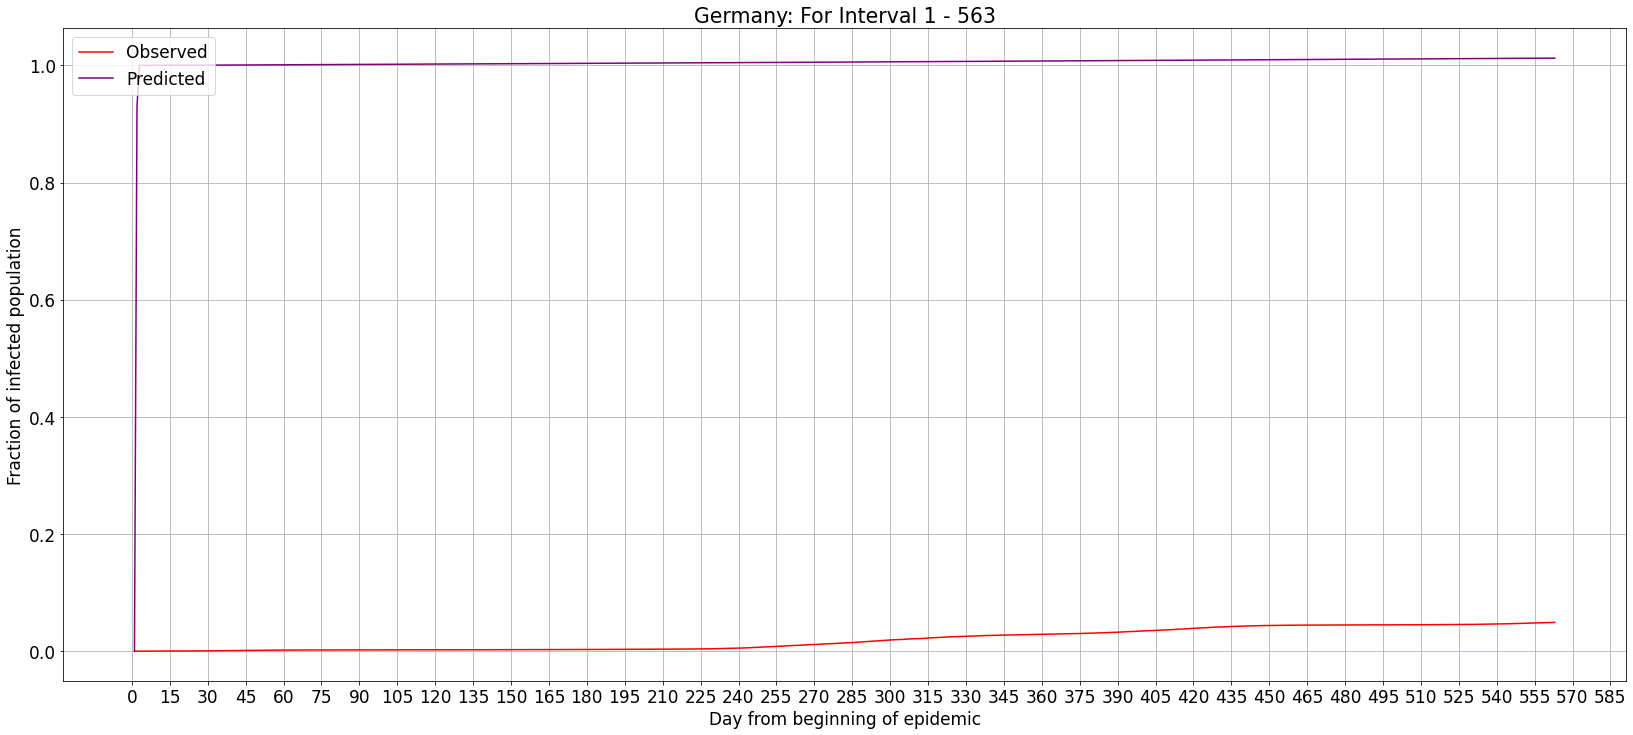

In [92]:
plt.figure()
plt.plot(x_int4,inp.values,color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(0,600,15))
#plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1 - 563')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [93]:
def f(a):
    sol = solve_ivp(equations, [1, inp.shape[0]],[Sign,Sres,I4, R4], t_eval= x_int4) 
    p = 1 - sol.y[0, :]
    MSE = np.sum(np.square(p-inp))
    return MSE

In [94]:
a0 = 0.1
res = optimize.minimize(f,a0)
a = res.x
sol = solve_ivp(equations, [1, inp.shape[0]],[Sign,Sres,I4, R4], t_eval= x_int4)
# Compare solution with a with observed data
print(p)

NameError: name 'optimize' is not defined

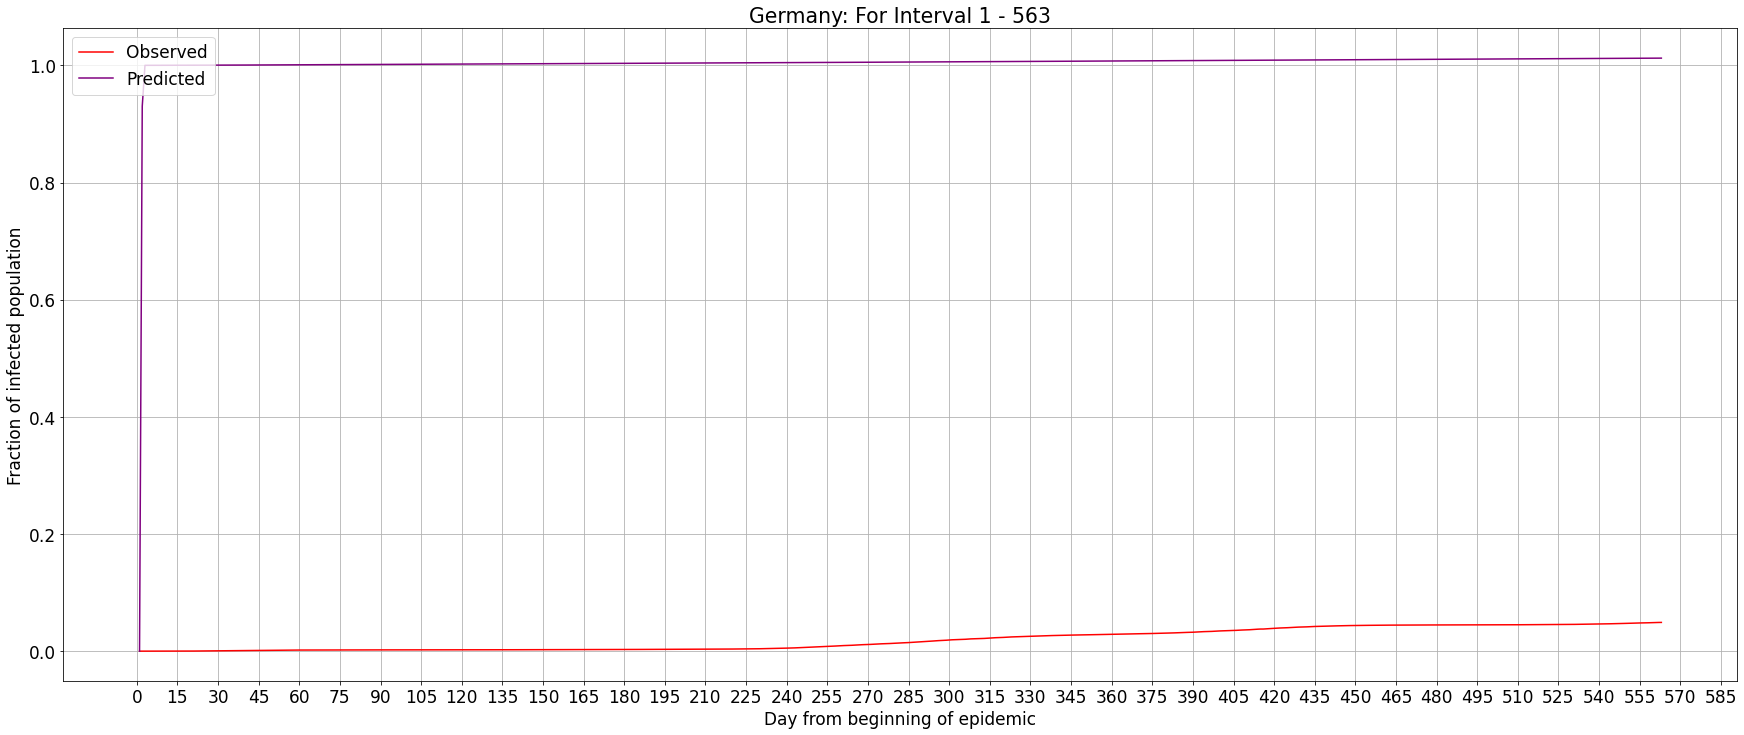

In [95]:
plt.figure()
plt.plot(x_int4,inp.values,color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(0,600,15))
#plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Germany: For Interval 1 - 563')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [96]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a4 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ger_norm_case[:563]

In [97]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S4, R4], t_eval=x_int4)

In [98]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a4,MSE)

0.1100524454836806 0.000690983686752321


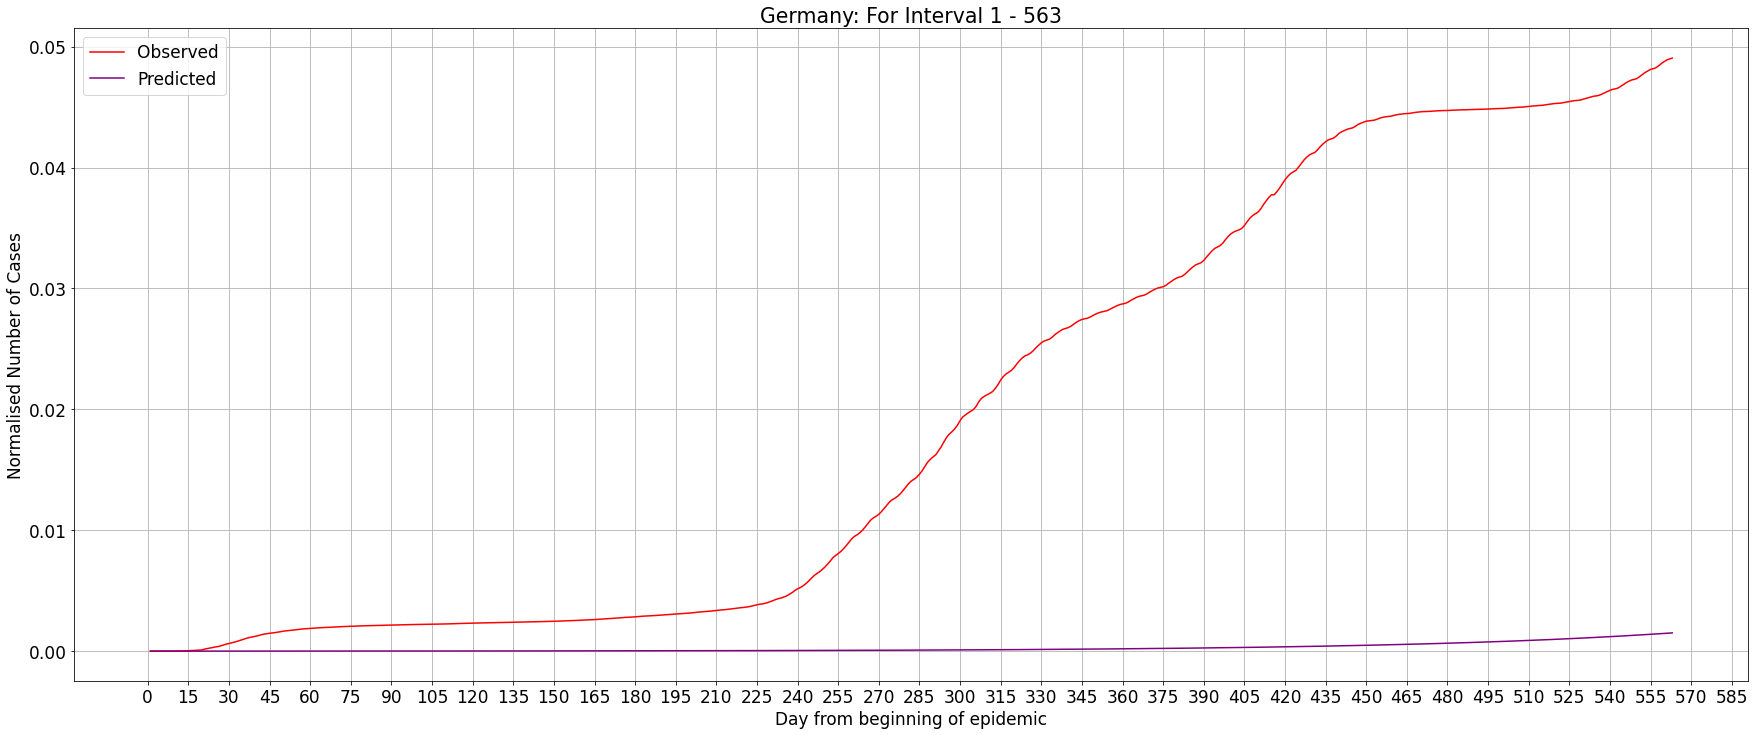

In [100]:
plt.figure()
plt.plot(x_int4,ger_norm_case[:574],color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(0,600,15))
#plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalised Number of Cases')
plt.title('Germany: For Interval 1 - 563')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()